# Data Visualization in Python

In this notebook:
- [Matplotlib](#Matplotlib)
    - [Quick Matplotlib Orientation](#Quick-Matplotlib-Orientation)
    - [Figures, Axes, and Subplots](#Figures,-Axes,-and-Subplots)
    - [Common Plot Types](#Common-Plot-Types)
    - [Labeling Plots](#Labeling-Plots)
- [Plotting with Pandas](#Plotting-with-Pandas)
    - [Pandas Plotting Overview](#Plotting-with-Pandas)
    - [Example: Plotting GFEBS Data](#Example:-Plotting-GFEBS-Data)
- [Seaborn](#Seaborn)
- [Interactive Graphics with Bokeh](#Interactive-Graphics-with-Bokeh)
    - [Example: COVID19 Dashboard](#Example:-COVID19-Dashboard)
- [Making GIFs](#Making-GIFs)

# Matplotlib

Matplotlib is the most common plotting library in python.  Those familiar with MATLAB will notice that it has a similar interface and appearance, which is due to the fact that it was originally developed in 2002 by a physics PhD student who liked the MATLAB computing interface but needed more computational power than it could provide.  Matplotlib has matured since then and now provides a robust platform for producing high quality, mainly 2-dimensional and static plots.

This notebook gives a quick intro to the main mechanics and functionality to help get started in Matplotlib.  For more details, see the [matplotlib documentation](https://matplotlib.org/), or it's always great to find and work through some example visualizations you find on the web.

### Quick Matplotlib Orientation

In [1]:
#Standard import convention for pyplot, the primary matplotlib plotting tool
import matplotlib.pyplot as plt

#Lets also import pandas and numpy
import pandas as pd
import numpy as np

To show matplotlib figures directly in the Jupyter notebook environment, we need to use either the `%matplotlib notebook` or `%matplotlib inline` magic command.  The notebook command provides better interactivity, and tends to be used more often.

In [2]:
%matplotlib notebook

Now lets plot!

<IPython.core.display.Javascript object>


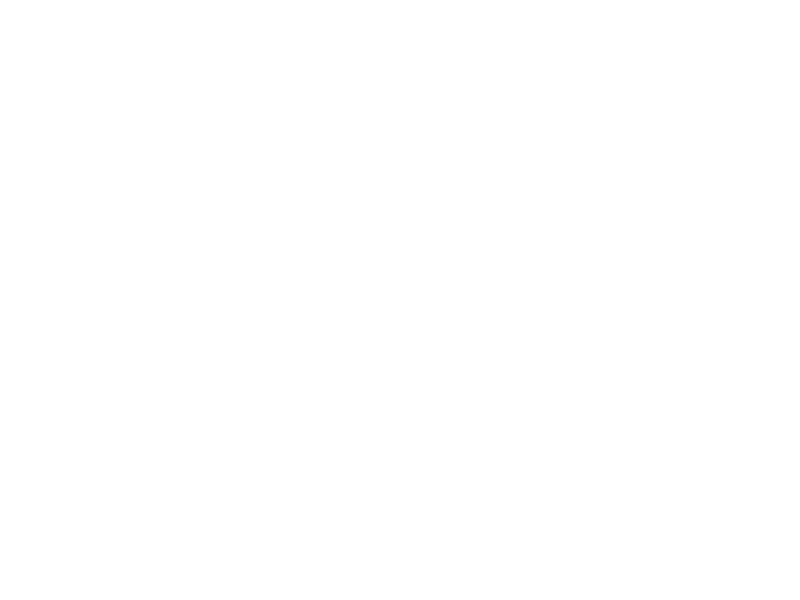

In [3]:
#A simple plot
x = np.arange(0,15,.01)
y = np.sin(x)
plt.plot(x,y,color='red',linewidth=3)
#Thanks to the %matplotlib notebook command, the plot will automatically display in the cell output

In [4]:
#Say we want to make another plot with y2 = 2*sin(x)
y2 = 2*np.sin(x)
plt.plot(x,y2,color='blue',linewidth=3)

You may have noticed that the 2nd plotting call updated the previously created plot.  plt() essentially looks for the currently active figure, and creates one if one doesn't exist.  For this reason, some people prefer to use `%matplotlib inline`, which always displays a plot in the output of the current cell (that is, *inline* with the flow of the notebook).  Lets temporarily switch to inline to see the difference.

In [5]:
#This will plot each new plt.plot() call in its own cell
%matplotlib inline

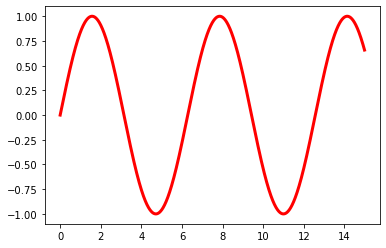

In [6]:
plt.plot(x,y,color='red',linewidth=3)

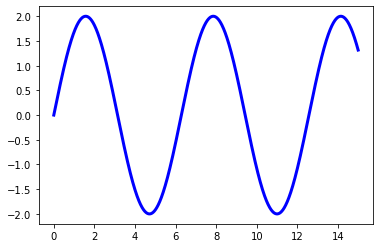

In [7]:
#This will plot a new figure in the output of this cell
plt.plot(x,y2,color='blue',linewidth=3)

However, `%matplotlib notebook` provides some additional functionality that will be useful, such as the automatic inspection and saving buttons, as well as the ability to add to and manipulate a plot from multiple cells, so we will go back to that one.

In [8]:
%matplotlib notebook

We can create new figures with plt.figure() to move on to a new plot.

<IPython.core.display.Javascript object>


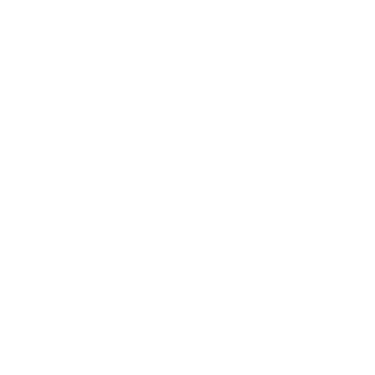

In [9]:
plt.figure(figsize=(3,3)) #Specify figsize in (x inches, y inches) to make it smaller
plt.plot(x,y,color='red',linewidth=3)

<IPython.core.display.Javascript object>


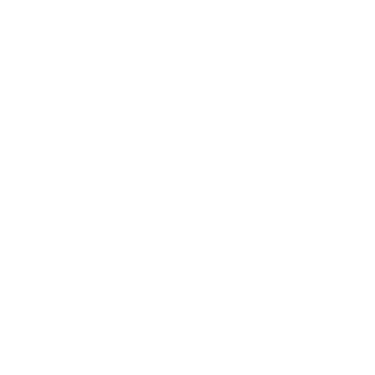

In [10]:
#Move on to a NEW figure instead of continuing to add to the previous plot
plt.figure(figsize=(3,3))
plt.plot(x,y2,color='blue',linewidth=3)

### Figures, Axes, and Subplots

Before moving on and creating cool looking plots, it's helpful to understand the way that matplotlib sets up the containers that will hold the plots, using Figure, Subplot, and Axes objects.

This can be a bit confusing, because matplotlib plots into **Axes** objects, not into **Figure** objects.  Essentially, each Axes object is a canvas which we can draw on with pyplot, and a Figure object is a container that holds one or more Axes objects.

Lets look at a couple examples of why this distinction matters.

<IPython.core.display.Javascript object>


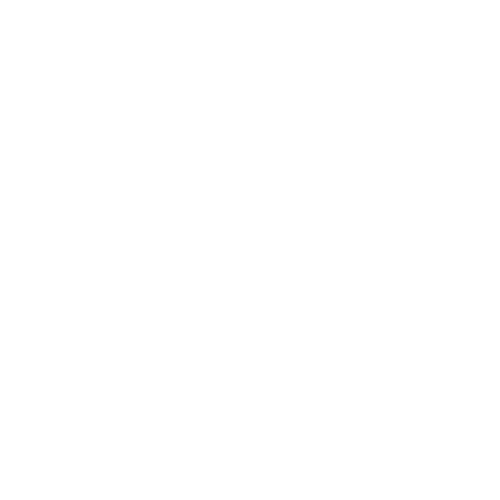

In [11]:
#Set up a new figure
fig1 = plt.figure(figsize=(4,4))
#A blank figure should show up below (use fig1.show() if it doesn't)
#You can ignore it for now, but it will populate as we run following cells

In [12]:
#fig1 is a Figure object
type(fig1)

matplotlib.figure.Figure

In [13]:
#When we establish a new Figure, it automatically creates a single Axes object
#We can access with wtih plt.gca(), for get current axes
ax1 = plt.gca()
type(ax1)
#Notice that this now initiated the x and y axes in the figure above

matplotlib.axes._subplots.AxesSubplot

Since a Figure contains one or more Axes objects, Axes objects are effectively subplots, so sometimes you will see the terms axes and subplot used interchangably.  In fact, we just saw that `ax1` is an "AxesSubplot" object, further proof that the terms are inter-mingled.  

In [14]:
#At this point, we can't plot directly into the figure, so this won't work
#fig.plot(x,y,color='red')

#However, we CAN plot into the axes object
ax1.plot(x,y,'red')

Note that if we simply run `plt.plot()` instead of `ax.plot()`, it will automatically plot into the current Axes object.  Either method will work, so it's a personal preference which one to use.  I prefer to use ax.plot() to make sure I know exactly what plot I am referring to.  For example, if you use plt.plot() in your cell, then try to come back to the current cell after moving on to a new Axes object elsewhere in the notebook, the plt.plot() command may not do what you expect. 

In [15]:
#Plot into most recent Axes object with plt.plot()
plt.plot(x,y2,'blue')
#This should have added a blue curve to the previous plot

<IPython.core.display.Javascript object>


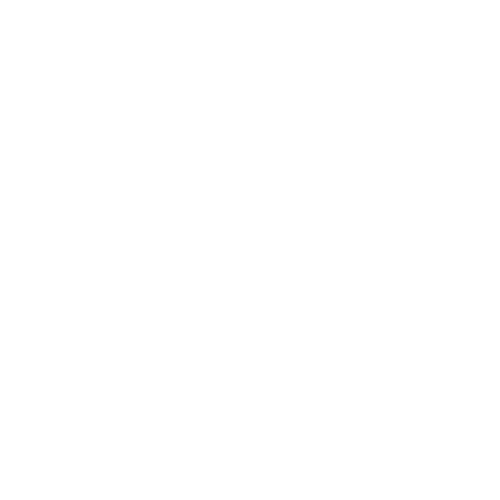

In [16]:
#We can use the Axes object to set up and plot in subplots within a figure
fig2 = plt.figure(figsize=(4,4))
ax1 = fig2.add_subplot(2, 2, 1)
ax2 = fig2.add_subplot(2, 2, 2)
ax3 = fig2.add_subplot(2, 2, 3)
ax1.plot(x,y,'red')
ax2.plot(x,y2,'blue')
ax3.plot(x,y,'green')

It is also common to creat an array of axes/subplot objects when initializing a new figure with subplots.

<IPython.core.display.Javascript object>


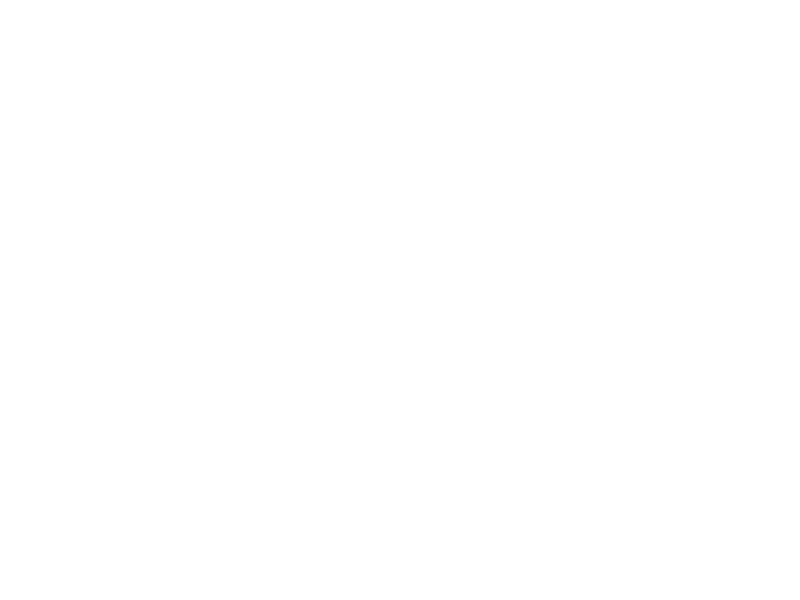

In [17]:
fig, axes = plt.subplots(2,2)

In [18]:
#Now note that axes is an array of AxesSubplot objects
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205A5603190>,
      dtype=object)

In [19]:
#This makes it easy to reference a desired subplot, starting with 0,0 for upper left
axes[0,0].plot(x,y,'red')
axes[0,1].plot(x,2*y,'blue')
axes[1,0].plot(x,3*y,'green')
#See plot above for updated suplots

<IPython.core.display.Javascript object>


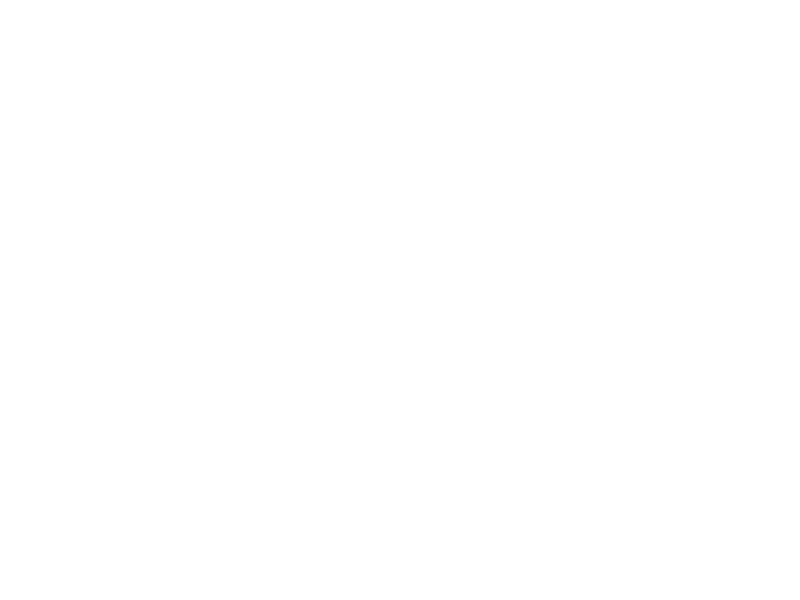

In [20]:
#We can also adjust the padding and whitespace around and between the subplots
fig, axes = plt.subplots(2,2)
axes[0,0].plot(x,y,'red')
axes[0,1].plot(x,2*y,'blue')
axes[1,0].plot(x,3*y,'green')
axes[1,1].plot(x,4*y,'purple')
#Adjust padding on left, right, top and bottom, and adjust width-space and height space between
plt.subplots_adjust(wspace=0, hspace=0)

<IPython.core.display.Javascript object>


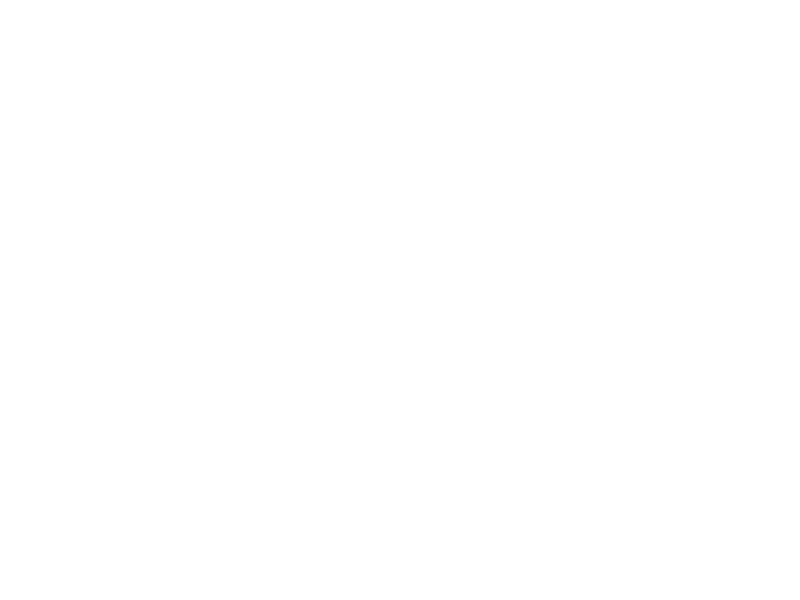

In [21]:
#You may have noticed that the y-axes are different for each subplot
#We can force subplots to use same axes
fig, axes = plt.subplots(2,2,sharex=True,sharey=True)
axes[0,0].plot(x,y,'red')
axes[0,1].plot(x,2*y,'blue')
axes[1,0].plot(x,3*y,'green')
axes[1,1].plot(x,4*y,'purple')
#Adjust padding on left, right, top and bottom, and adjust width-space and height space between
plt.subplots_adjust(wspace=0, hspace=0)

We canvsave a figure with `fig.savefig(filname)`, where fig is the name of a Figure object.  We could also use `plt.savefig(filename)'` to save the current active figure, though this seems to work best when used inside the same cell where the figure was defined.

In [22]:
fig.savefig('Images/sine_waves.png')

The savefig() method infers the file type from the name, so if you provided a filename with .pdf or .jpg or .svg, it will automatically save into that format.  

With the basics covered, lets move on to making cool plots!

### Common Plot Types

#### Line Plots

We've already seen basic line plots, but lets take a closer look at how they are constructed and get more familiarity with the various mechanics of how to build plots in matplotlib.

In [23]:
#Build some data to plot
x_data = np.array([1,2,3,4,5,6,7,8,9,10])
linear_data = 2*x_data
exponential_data = x_data**2

<IPython.core.display.Javascript object>


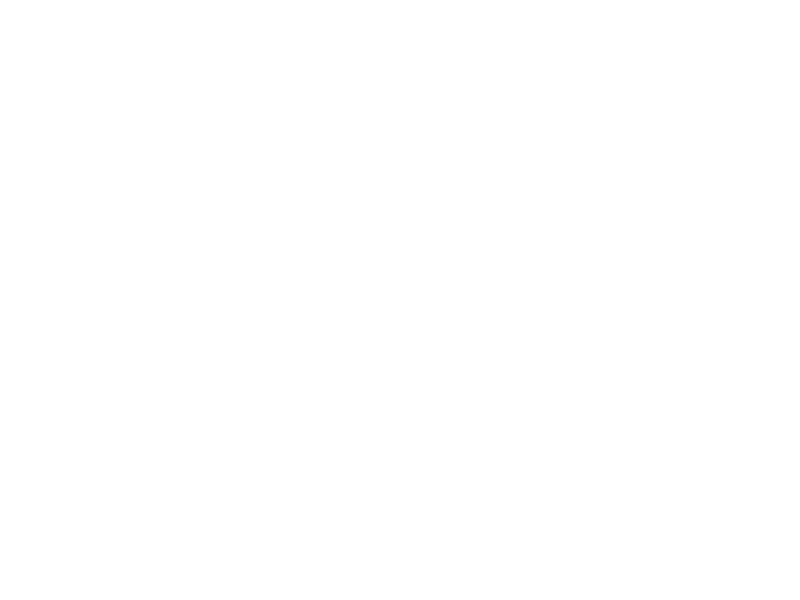

In [24]:
#initialize figure and axes
fig, axes = plt.subplots(3,3)

#We can just specify x and y value to plot a single line
axes[0,0].plot(x_data,linear_data,color='blue')

#If we just specify y, it automatically uses index as the x coordinates
axes[0,1].plot(linear_data,color='red')

#To plot multiple lines, we could call plot multiple times
axes[0,2].plot(linear_data)
axes[0,2].plot(exponential_data)

#We can also plot multiple lines by feeding in ax.plot(x1,y1,x2,y2,...)
axes[1,0].plot(x_data,linear_data,x_data,exponential_data)

#Specify various line and marker styles with (x1,y1,format1,x2,y2,format2,...)
axes[1,1].plot(x_data,linear_data,'-o',x_data,exponential_data,':x')

Instead of feeding in x and y arrays, we can also feed in a dataset and then reference the name of the column containing the x and y data.

In [25]:
#Build a dataframe
df_lines = pd.DataFrame({'x':x_data,'y1':linear_data,'y2':exponential_data})
df_lines

x  y1   y2
0   1   2    1
1   2   4    4
2   3   6    9
3   4   8   16
4   5  10   25
5   6  12   36
6   7  14   49
7   8  16   64
8   9  18   81
9  10  20  100

In [26]:
#Plot single line by specifying columns in data
axes[1,2].plot('x','y1',data=df_lines)

<ipython-input-26-4380584bd719>:2: RuntimeWarning: Second argument 'y1' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  axes[1,2].plot('x','y1',data=df_lines)


In [27]:
#It's tricky to plot multiple columns using the data argument
#Easier to just feed in multiple columns directly
axes[2,0].plot(df_lines['x'],df_lines[['y1','y2']])

<IPython.core.display.Javascript object>


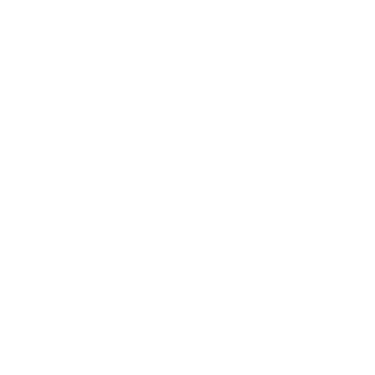

In [28]:
#Another useful line function is filling between two lines
plt.figure(figsize=(3,3))
plt.plot(x_data,linear_data,x_data,exponential_data)
plt.fill_between(x_data,linear_data, exponential_data, 
                       facecolor='blue', 
                       alpha=0.25)

#### Scatterplots

<IPython.core.display.Javascript object>


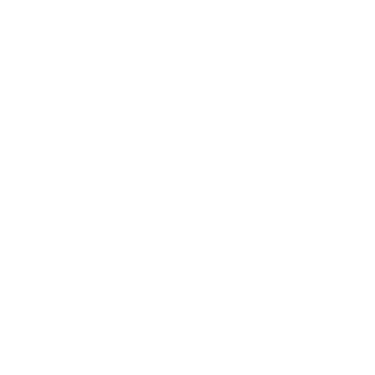

In [29]:
fig = plt.figure(figsize=(3,3))
#Basic scatter plot with plt.scatter() or ax.scatter()
plt.scatter(x_data,linear_data)

<IPython.core.display.Javascript object>


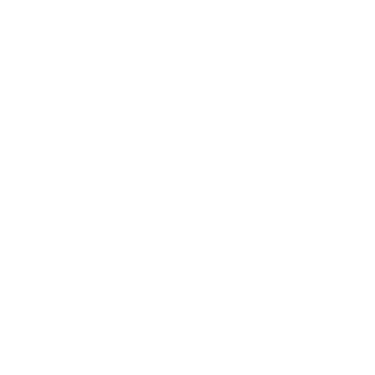

In [30]:
#Adjust attributes such as size (in screen pixels), color, and marker
fig = plt.figure(figsize=(3,3))
plt.scatter(x_data,linear_data,s=100,color='red',marker='^')

#### Barplots

<IPython.core.display.Javascript object>


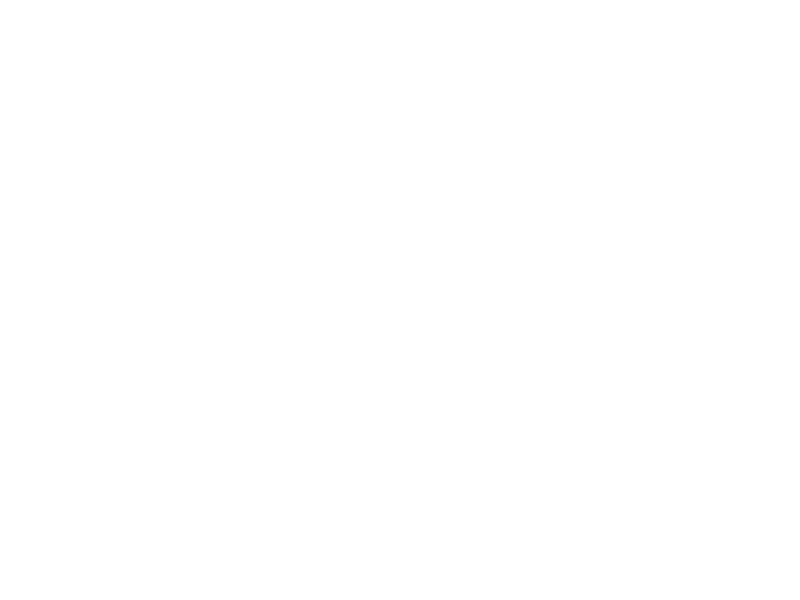

<BarContainer object of 10 artists>

In [31]:
plt.figure()
plt.bar(x_data, linear_data, width = 0.3,color='blue')

In [32]:
#It can be clunky to plot mutliple bars side by side.  Generally have to manually build the new list of x coordinates
x_data2 = [x+.25 for x in x_data]
plt.bar(x_data2,exponential_data,width = 0.3,color='red')

<BarContainer object of 10 artists>

<IPython.core.display.Javascript object>


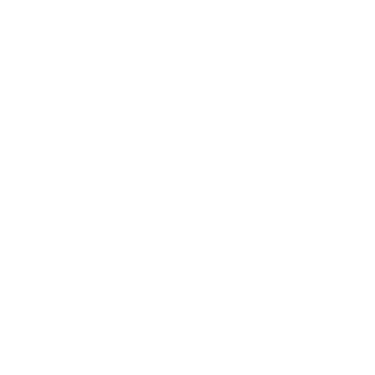

<BarContainer object of 10 artists>

In [33]:
#To make stacked bar charts, we need to speicfy the start of the upper stack as the top of the lower stack
plt.figure(figsize=(3,3))
plt.bar(x_data,linear_data,width = 0.3,color='blue')
plt.bar(x_data,exponential_data,width=0.3,color='red',bottom=linear_data)

<IPython.core.display.Javascript object>


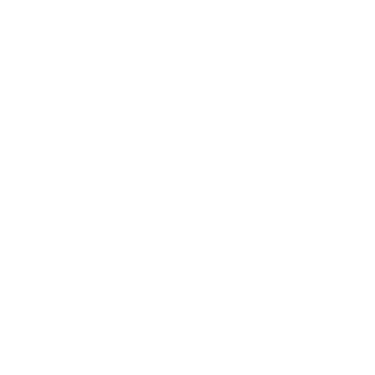

<BarContainer object of 10 artists>

In [34]:
#Horizontal bar charts
plt.figure(figsize=(3,3))
plt.barh(x_data, linear_data, height = 0.3, color='b')
plt.barh(x_data, exponential_data, height = 0.3, left=linear_data, color='r')

#### Histograms

Neat example drawn from Coursera course Applied Plotting in Python.

<IPython.core.display.Javascript object>


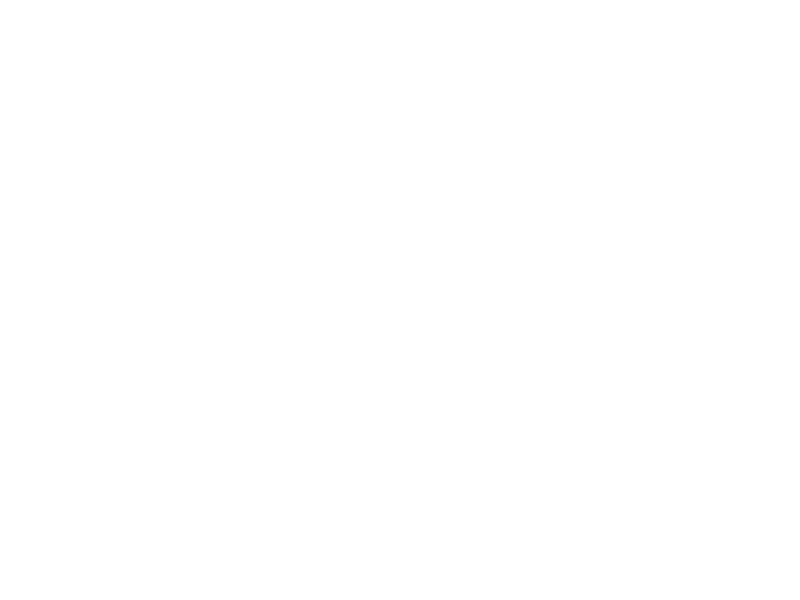

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000205A550F790>],
      dtype=object)

In [35]:
fig, axes = plt.subplots(2, 2, sharex=True)
axes_list = list(np.reshape(axes,(4,1)))
axes_list[0]

<IPython.core.display.Javascript object>


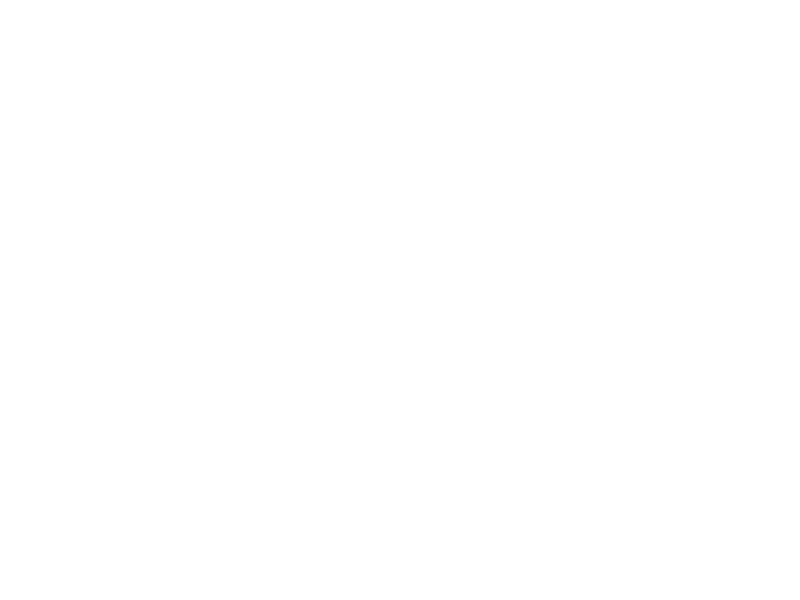

In [36]:
# create 2x2 grid of axis subplots
fig, axes = plt.subplots(2, 2, sharex=True)
axes_list = np.hstack(np.reshape(axes,(4,1)))

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axes)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axes_list[n].hist(sample)
    axes_list[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


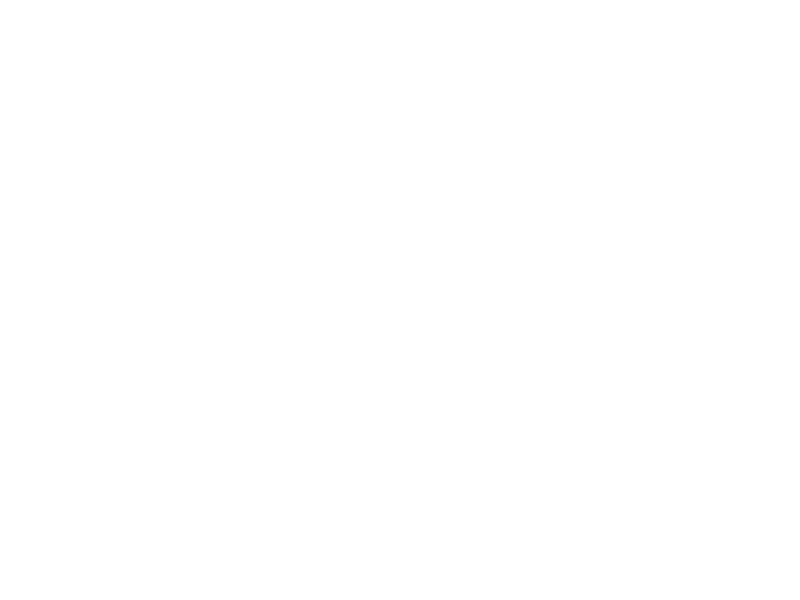

In [37]:
fig, axes = plt.subplots(2, 2, sharex=True)
axes_list = np.hstack(np.reshape(axes,(4,1)))

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axes)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axes_list[n].hist(sample,bins=50)
    axes_list[n].set_title('n={}'.format(sample_size))

#### Box and Whisker

In [38]:
#Generate some random normal, uniform, and gamma random variables
sample_size = 10000
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
uniform_sample = np.random.random(size=sample_size)
gamma_sample = np.random.gamma(2, size=sample_size)

df_rand= pd.DataFrame({'normal': normal_sample, 
                               'uniform': uniform_sample,
                               'gamma': gamma_sample})

<IPython.core.display.Javascript object>


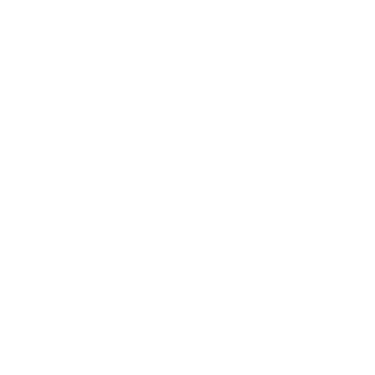

<ipython-input-39-684d7ed220f1>:3: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  _ = plt.boxplot([df_rand['normal'], df_rand['uniform'], df_rand['gamma'] ], whis='range')


In [39]:
plt.figure(figsize=(3,3))
# plot boxplots for all three of df's columns
_ = plt.boxplot([df_rand['normal'], df_rand['uniform'], df_rand['gamma'] ], whis='range')
#NOTE: This technique of assigning plt.boxplot to a dummy variable "_" is sometimes used to supress the output

#### Heatmaps

<IPython.core.display.Javascript object>


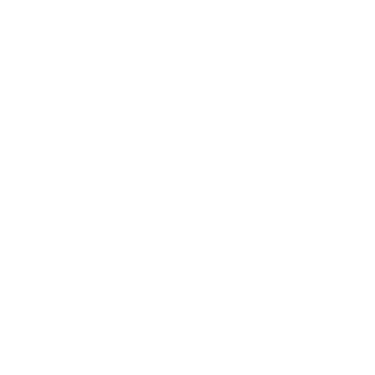

In [40]:
#We can create heatmaps in matplotlib using plt.hist2d
plt.figure(figsize=(3,3))

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.hist2d(X, Y, bins=25)

#Add a colorbar
plt.colorbar()

We can also create heatmaps using the plt.pcolor() plotting call.  Here's a neat example adapted from https://stackoverflow.com/questions/14391959/heatmap-in-matplotlib-with-pcolor.  

<IPython.core.display.Javascript object>


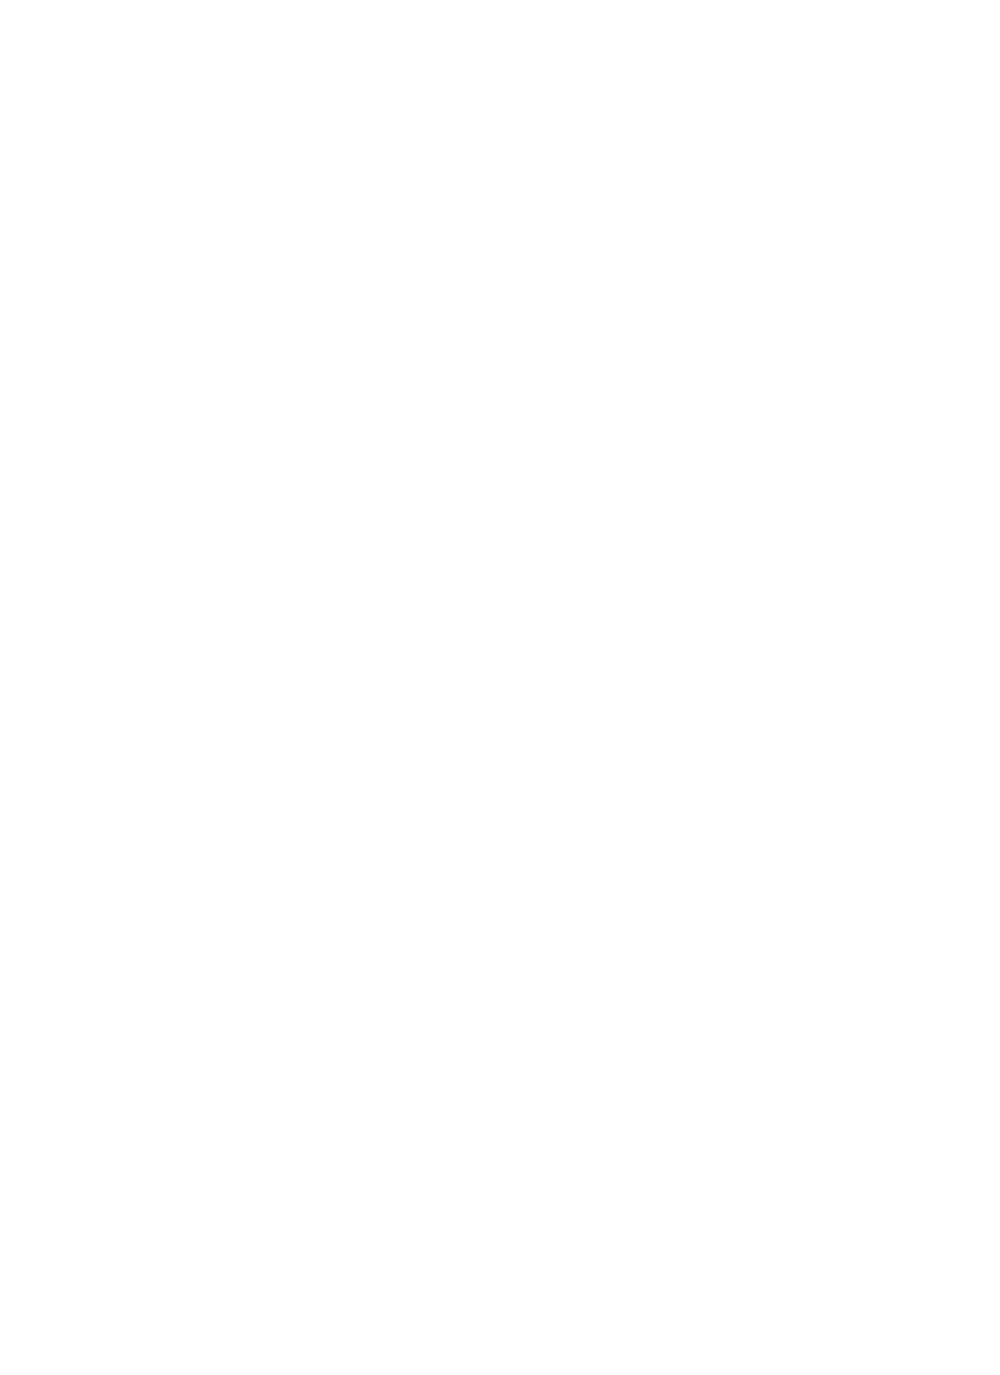

<ipython-input-41-ffe7bbdccc24>:52: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
<ipython-input-41-ffe7bbdccc24>:53: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
<ipython-input-41-ffe7bbdccc24>:55: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
<ipython-input-41-ffe7bbdccc24>:56: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False


In [41]:
nba = pd.read_csv("http://datasets.flowingdata.com/ppg2008.csv", index_col=0)

# Normalize data columns
nba_norm = (nba - nba.mean()) / (nba.max() - nba.min())

# Sort data according to Points, lowest to highest
# This was just a design choice made by Yau
# inplace=False (default) ->thanks SO user d1337
nba_sort = nba_norm.sort_values('PTS', ascending=True)

nba_sort['PTS'].head(10)

# Plot it out
fig, ax = plt.subplots()
heatmap = ax.pcolor(nba_sort, cmap=plt.cm.Blues, alpha=0.8)

# Format
fig = plt.gcf()
fig.set_size_inches(8, 11)

# turn off the frame
ax.set_frame_on(False)

# put the major ticks at the middle of each cell
ax.set_yticks(np.arange(nba_sort.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(nba_sort.shape[1]) + 0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

# Set the labels

# label source:https://en.wikipedia.org/wiki/Basketball_statistics
labels = [
    'Games', 'Minutes', 'Points', 'Field goals made', 'Field goal attempts', 'Field goal percentage', 'Free throws made', 'Free throws attempts', 'Free throws percentage',
    'Three-pointers made', 'Three-point attempt', 'Three-point percentage', 'Offensive rebounds', 'Defensive rebounds', 'Total rebounds', 'Assists', 'Steals', 'Blocks', 'Turnover', 'Personal foul']

# note I could have used nba_sort.columns but made "labels" instead
ax.set_xticklabels(labels, minor=False)
ax.set_yticklabels(nba_sort.index, minor=False)

# rotate the xticks
plt.xticks(rotation=90)

ax.grid(False)

# Turn off all the ticks
ax = plt.gca()

for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

### Labeling Plots

The NBA heatmap examples highlights the importance of being able to manipulate the axis and tick labels.  Lets take a closer look at how to manipulate these features of a plot.

#### Title, Ticks, and Axis Labels

<ipython-input-42-51d94f5920af>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(figsize=(6,6))


<IPython.core.display.Javascript object>


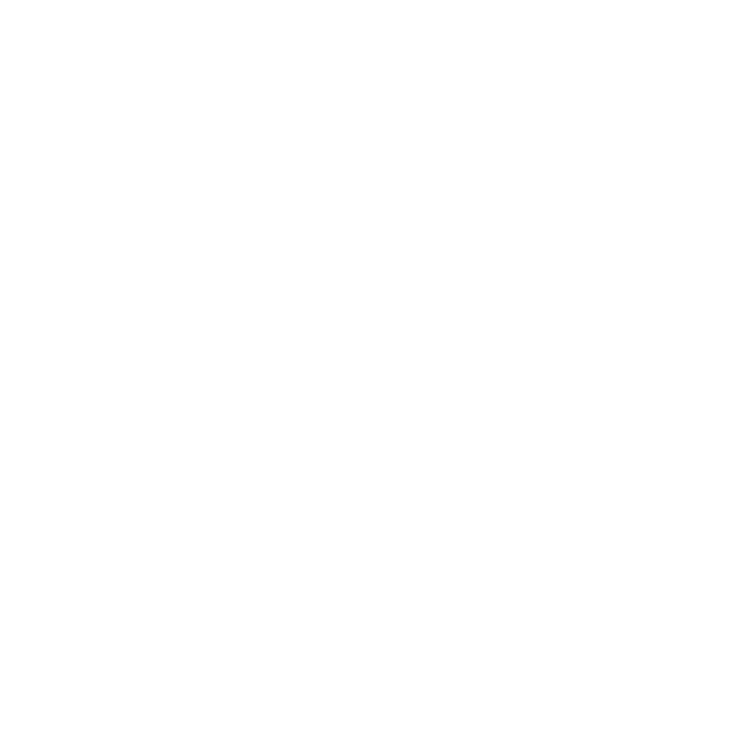

<BarContainer object of 10 artists>

In [42]:
#Recreate a basic bar chart
x_data = np.array([1,2,3,4,5,6,7,8,9,10])
linear_data = 2*x_data
exponential_data = x_data**2
fig,ax = plt.subplots(figsize=(6,6))
bar_width = 0.3
ax.bar(x_data,linear_data,width=bar_width,color='blue')
x_data2 = [x+bar_width for x in x_data]
ax.bar(x_data2,exponential_data,width=bar_width,color='red')

In general there are two ways to adjust the plot labels.  We can either use plt commands (e.g. `plt.title("Plot Title")` to set title), or we can use methods of the AxesSubplot objects (e.g. `ax.set_title("Plot Title")`).  I prefer to use the Axes methods, because they tend to be more explicit and clear.  For one, when calling an Axes object you know exactly what object it is referring to, whereas plt.title() refers to the currently active axes object (which can change).

Second, the Axes methods tend to be more explicit.  For example, we can call `plt.xlim()` to GET a tuple of the current x limits, or we can call `plt.xlim([0,5])` to SET the xlimits.  By contrast, the commands for Axes objects tend to be more clear, e.g. `ax.get_xlim()` to get the limits and `ax.set_xlim([0,5])` to set it.  Hence, I mainly use the Axes methods, but both are available.

In [43]:
#Some common methods to update labels.  These should update the bar plot above after running this cell.

#Set title
#Matplotlib doesn't have built in subtitle, but you can add newline character \n to move to new line
ax.set_title('Bar Chart \nBuilt in matplotlib')

#Set x and y limits
ax.set_xlim([-1,12])
ax.set_ylim([-10,np.max(exponential_data)+20])

#Set x and y axis labels
ax.set_xlabel('Categories')
ax.set_ylabel('Value')

#Set exact xtick locations and 
ax.set_xticks([2,4,6,8,10])
ax.set_xticklabels(['A','B','C','D','E'],rotation=90)



[Text(0, 0, 'A'),
 Text(0, 0, 'B'),
 Text(0, 0, 'C'),
 Text(0, 0, 'D'),
 Text(0, 0, 'E')]

#### Legends

There are two common implementations to get legends.  First is to add all the plots, and then call `ax.legend(labels)` with a list of the labels you want to add.

<ipython-input-44-75339368dd4c>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(figsize=(4,4))


<IPython.core.display.Javascript object>


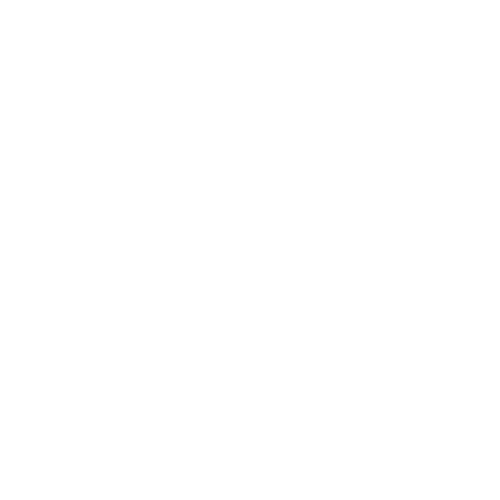

In [44]:
fig,ax = plt.subplots(figsize=(4,4))
ax.plot(x_data,linear_data,'-bo',x_data,exponential_data,':rx')
ax.legend(['Linear','Exponential'])

Another approach is to add a label to each element as it is plotted, then simply call legend() at the end.

<ipython-input-45-3fd331eda51b>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(figsize=(4,4))


<IPython.core.display.Javascript object>


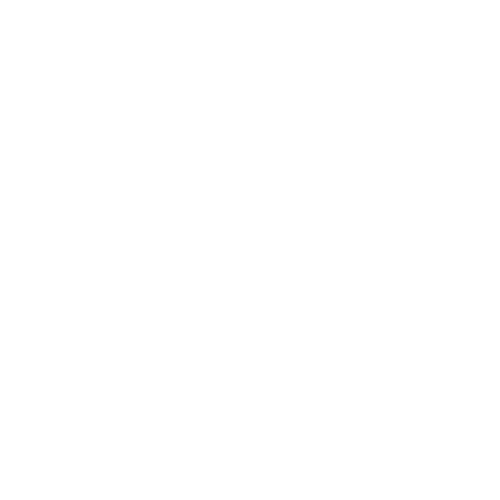

In [45]:
fig,ax = plt.subplots(figsize=(4,4))
ax.plot(x_data,linear_data,'-bo',label='Linear Data')
ax.plot(x_data,exponential_data,':rx',label='Exponential Data')
ax.legend(loc='center left') #See matplotlib documentation for more possible legend locations

#### Adding Annotations

<ipython-input-46-c1be48cc1b04>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(figsize=(4,4))


<IPython.core.display.Javascript object>


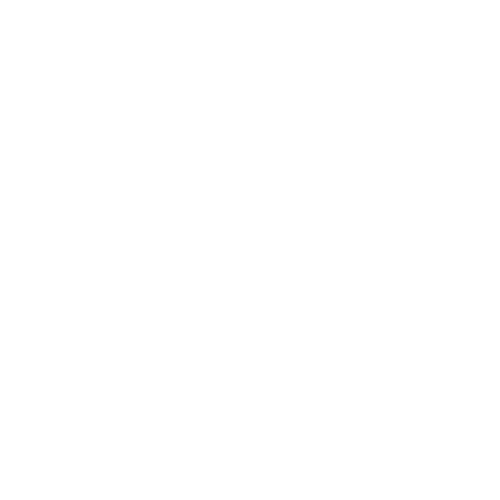

In [46]:
fig,ax = plt.subplots(figsize=(4,4))
ax.plot(x_data,linear_data,'-bo',x_data,exponential_data,':rx')

#We can add text with ax.text()
ax.text(np.min(x_data),np.max(exponential_data)-10,'My Plot',ha='left')

#We can also add fancier annotations such as arrows with ax.annotate()
labels = ['Close Together','Far Apart']
xs=[3,7]
ys = [exponential_data[x-1] for x in xs]
for i, label in enumerate(labels):
    ax.annotate(label,
                xy=(xs[i],ys[i]+5),
                xytext = (xs[i],ys[i]+25),
               arrowprops=dict(facecolor='black', headwidth=4, width=2,headlength=4),
               horizontalalignment='center', verticalalignment='top')
#The xytext option pushes the text up above

# Plotting with Pandas

Pandas has many built in methods for creating plots from the data with a DataFrame or Series.  These methods are built on top of matplotlib, but provide some useful shortcuts and functionality that often can be better suited to plotting the multiple columns of data we have in a DataFrame.  

Since the pandas plotting methods are implemented in matplotlib, we will need one of the matplotlib magic commands (`%matplotlib notebook` or `%matplotlib inline`), even if we do not call the matplotlib package at all.  Lets re-import the key components in case you are starting from this point in the notebook.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

#### Pandas Plotting Overview

In [48]:
#Create some fake stock data
np.random.seed(1)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))

#If we assign a name to the dataframe index and columns, then those names will show up in the plots
df.index.name = "Date"
df.columns.name = "Stocks"

df.head()

Stocks             A          B          C
Date                                      
2017-01-01  1.624345  20.727813 -19.033779
2017-01-02  1.012589  21.242887 -18.307862
2017-01-03  0.484417  18.460353 -14.986784
2017-01-04 -0.588551  19.044999 -15.587009
2017-01-05  0.276856  19.369273 -15.966526

<IPython.core.display.Javascript object>


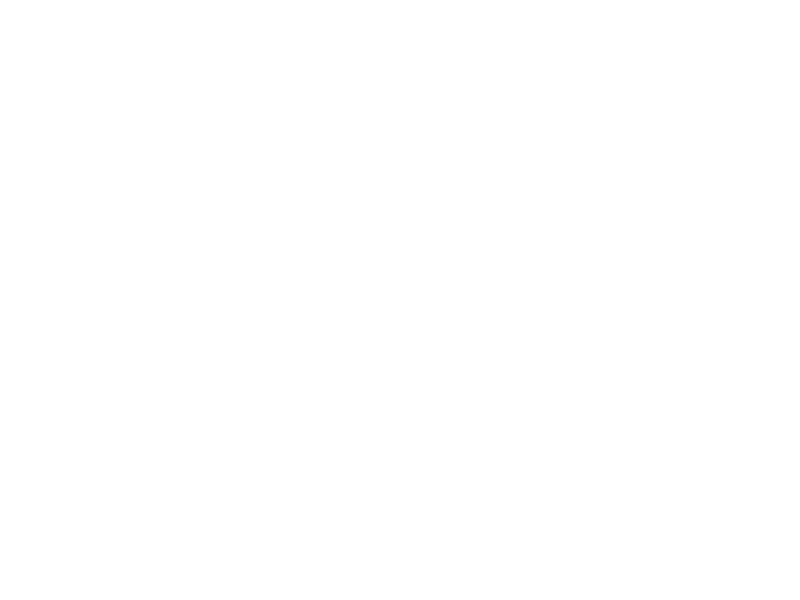

In [49]:
#Now plot a line chart
df.plot(kind='line',y=['A','B','C']) 
#y specifies which columns to plot.  Default is all columns, so we technically don't need to include it here. 
#By default df.plot() uses DataFrame index for x, or we could specify a different column if we wanted with df.plot(x='col_name')

<IPython.core.display.Javascript object>


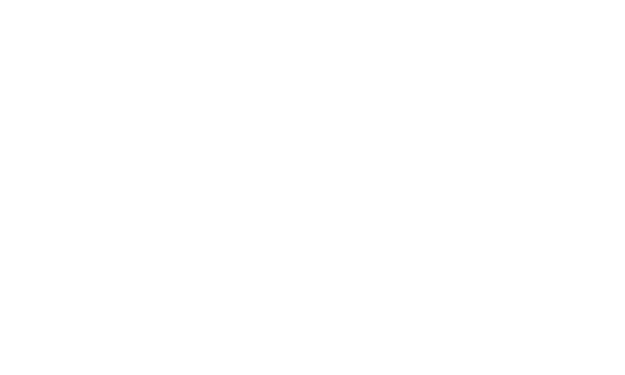

In [50]:
#We can also feed in many of the plot properties when we call df.plot()
df.plot(kind='line',title='Title',figsize=(5,3),rot=45) #Default is to plot all columns, so we dont' need y=

<IPython.core.display.Javascript object>


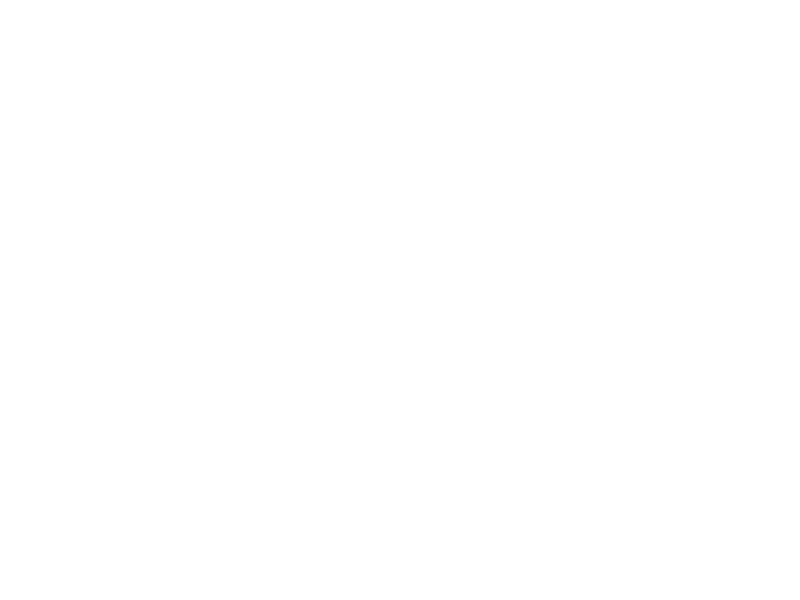

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205A77CC730>],
      dtype=object)

In [51]:
#Can also create separate subplot for each column
df.plot(subplots=True,layout=(3,1))

While we can specify some of the plot properties directly in the arguments of df.plot(), this only provides limited options.  For example, there's no easy way to add a custom axis label.  

To get more ability to customize the plot, we can take advantage of the fact that the plotting call `df.plot()` technically returns an AxesSubplot object.  For example, we could get the Axes object by running `ax = plt.gca()` right after making the plot (gca = get current axes), and then update the plot properties.  Or we could simply assign a plot call to an axes variable, as follows.

<IPython.core.display.Javascript object>


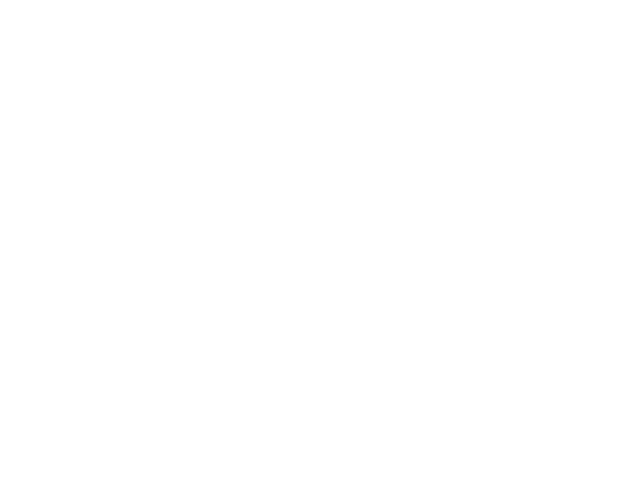

In [52]:
ax = df.plot(kind='line',figsize=(5,4))
ax.set_title('Cool Title')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
#Can also use matplotlib.pyplot to manipulate plot
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=.25)

So far we've seen line plots, implemented with `df.plot(kind='line')`.  Pandas supports many other types of plots using other values of the "kind" argument, including 'area', 'bar', 'barh', 'density', 'hist', 'kde', 'line', 'pie'.  

A quick note on plotting methods before moving on.  For any of the plot kinds, you can also create the plots with `df.plot.line()`, `df.plot.hist()`, etc.  These two approaches (`df.plot(kind='line')` vs `df.plot.line()`) are roughly the same, though sometimes the direct plotting call (e.g. `df.plot.hist()`) will offer some additional plotting parameters that you won't necessarily find in the generic plotting call (e.g. `df.plot(kind='hist')`).  Hence, I generally prefer to use `df.plot.kind()` methods.  

<IPython.core.display.Javascript object>


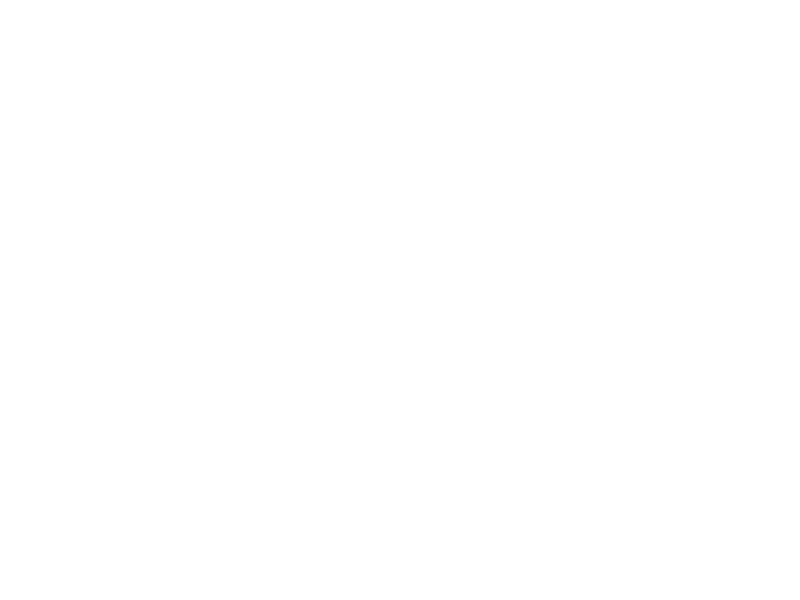

In [53]:
#Scatter plots
#This will plot 'A' on x axis, 'C' on y axis, and color code according to values in column B
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')

<IPython.core.display.Javascript object>


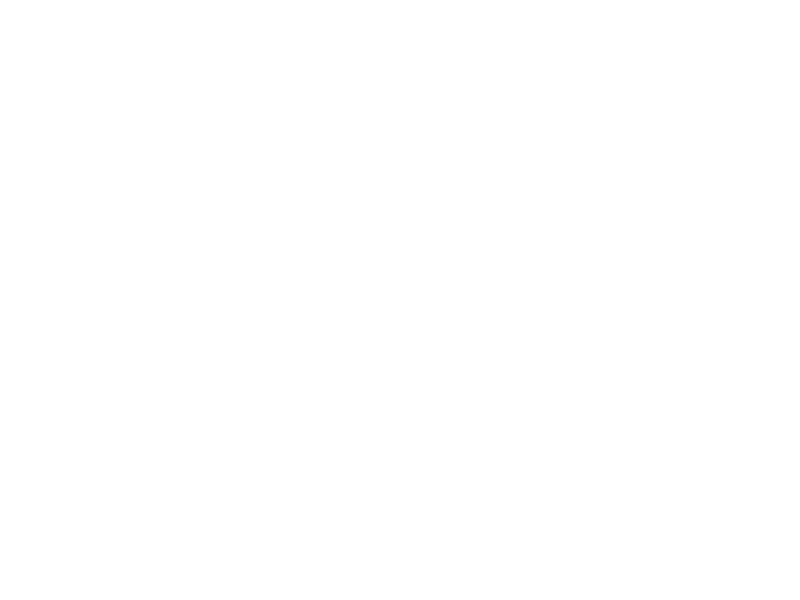

In [54]:
#Plot a histogram
#Here the histograms will overlap, so we use the alpha parameter to make the plots transparent (alpha=0 for fully transparent)
df.plot.hist(alpha=0.7,bins=10);

Kernel desnity estimates are a neat way to find continuous function fits to the data samples.

<IPython.core.display.Javascript object>


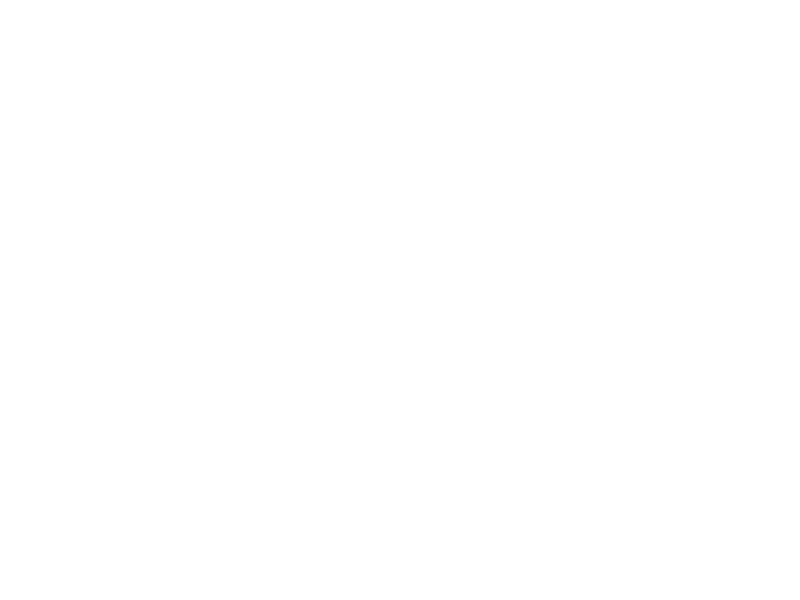

In [55]:
df.plot.kde()

<IPython.core.display.Javascript object>


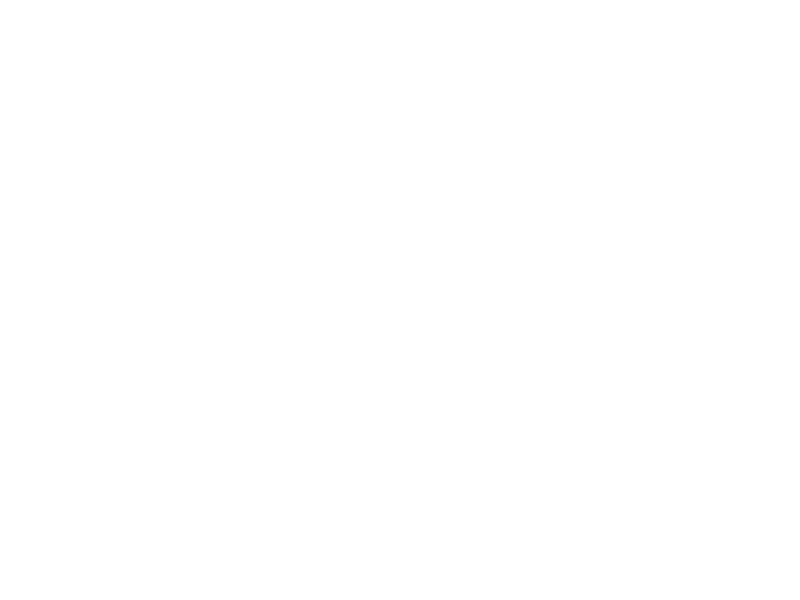

In [56]:
#Bar plot example, taken from McKinney's Python Data Analysis book
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot.bar()

We can easily create stacked bar charts with stacked=True.  This was not an available option with basic matplotlib, which highlights some of the added utility of using the pandas plotting methods.

<IPython.core.display.Javascript object>


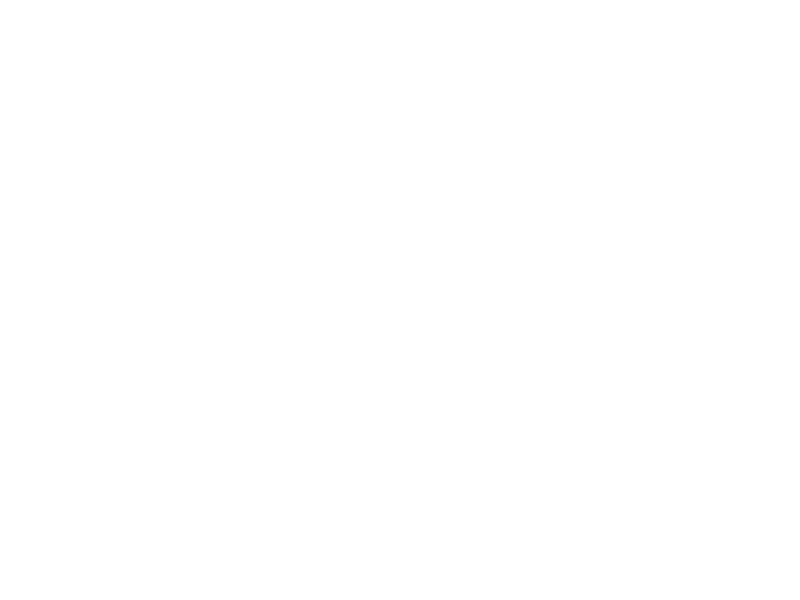

In [57]:
#Create horizontal stacked bar chart
df.plot.barh(stacked=True,alpha=.5)

We can also create a scatter matrix, very useful for machine learning applications.

In [58]:
#Lets load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())
df_iris = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
df_iris['Name'] = iris['target']
df_iris.Name = df_iris.Name.map(dict(zip(np.arange(len(iris['target_names'])),iris['target_names'])))
df_iris.head(3)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

     Name  
0  setosa  
1  setosa  
2  setosa

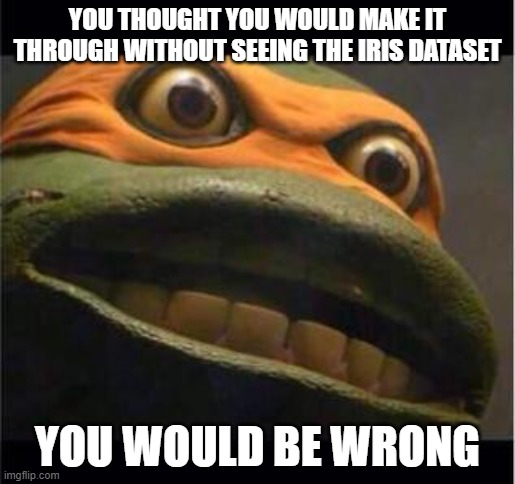

<IPython.core.display.Javascript object>


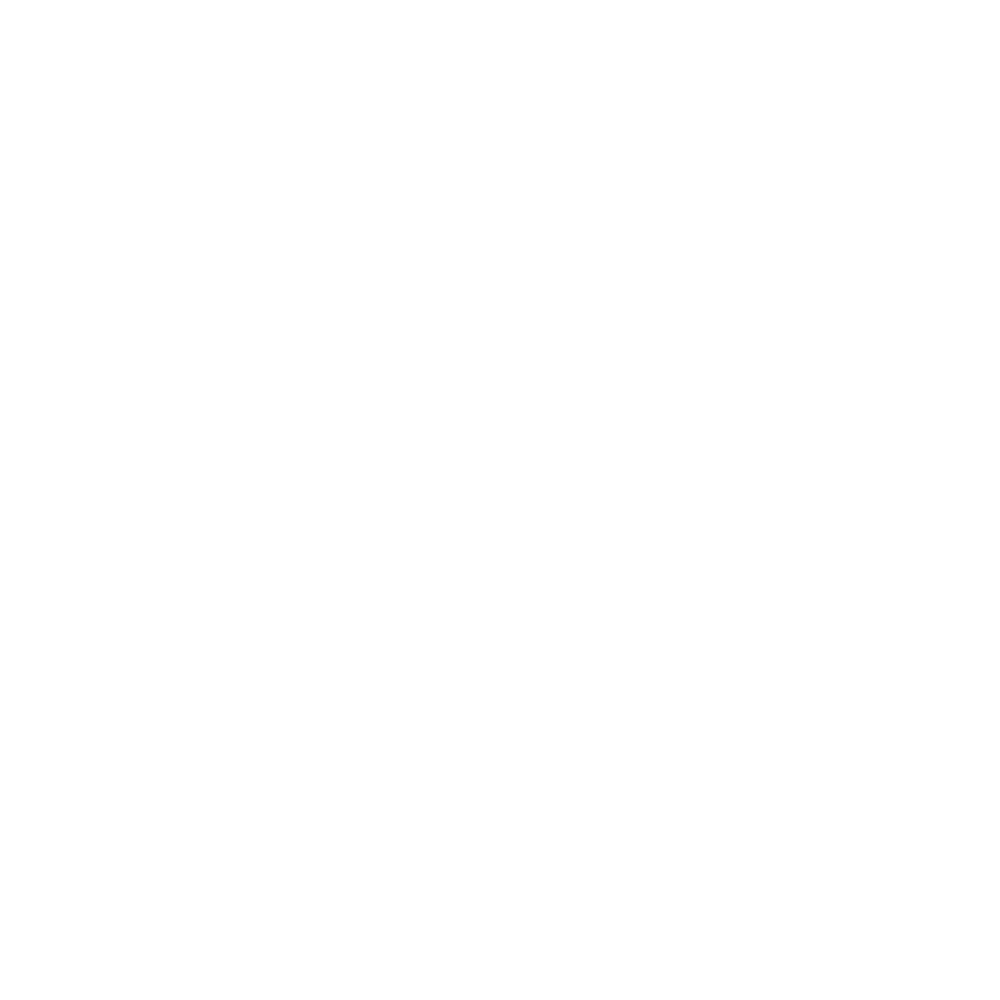

In [59]:
#The on diagonal plots show hist of values for that feature; off-diag show relation between each pair
ax = pd.plotting.scatter_matrix(df_iris,figsize=(8,8))


#### Example: Plotting GFEBS Data

Lets look at how you might use the pandas and matplotlib plotting techniques on an example data set.  This data set contains **FAKE** spending data for an Army unit, as provided by the University of Southern Carolina's Advanced Business Analytics Course (ABAC). Even though the data itself is fake, the format of the excel file matches the format you would get if you downloaded real data from the Army's General Fund Enterprise Business System (GFEBS).  Hence, the workflow and tools that follow could be re-used if you were to encounter GFEBS data in the future.  Even if you don't work with GFEBS or accounting data, I think it is helpful to see a typical workflow for reading, cleaning, processing, and plotting a dataset.

##### Read in and Clean Data

In [60]:
df_spent = pd.read_excel('Data/ABAC Student_PE FY17.xlsx',skiprows=23)
df_spent.head()

Unnamed: 0                 Unnamed: 1       Unnamed: 2  \
0  Functional Area                        NaN  Commitment Item   
1       135197VOFS  OTHER ADDITIONAL ACTIVITI             310A   
2       135197VOFS  OTHER ADDITIONAL ACTIVITI             21T0   
3       135197VOFS  OTHER ADDITIONAL ACTIVITI             21T0   
4       135197VOFS  OTHER ADDITIONAL ACTIVITI             2617   

             Unnamed: 3           Unnamed: 4   Unnamed: 5 Unnamed: 6  \
0                   NaN  Fiscal Month / Year  WBS Element        NaN   
1  General Supplies, no             001/2017  S.0000026.1       ABCT   
2        O/E-TDY Travel             001/2017  S.0000026.1       ABCT   
3        O/E-TDY Travel             001/2017  S.0000026.1       ABCT   
4   O/ECbatVehRepDeptLv             001/2017  S.0000026.1       ABCT   

                 Unnamed: 7 Unnamed: 8 Current AFP Allotment  \
0            Obligation Doc      Order           $         $   
1  GCSSARMY/00001/111144136   46000001         NaN       NaN   
2     GFEBS/00010/508741018   46000001         NaN       NaN   
3     GFEBS/00010/501747180   46000001         NaN       NaN   
4  GCSSARMY/00001/111347330   46000001         NaN       NaN   

  Commitments\n(Cum) Obligations (Cum) Expenses\n(Cum) Disbursements\n(Cum)  \
0                  $                 $               $                    $   
1             2515.3            2515.3             NaN                  NaN   
2             1790.2            1790.2             NaN                  NaN   
3             181.35            181.35          181.35               181.35   
4             1045.2            1045.2             NaN                  NaN   

  Available Budget (AFP) Available Budget (Allotment)  
0                      $                            $  
1                -2515.3                      -2515.3  
2                -1790.2                      -1790.2  
3                -181.35                      -181.35  
4                -1045.2                      -1045.2

Update column names as follows:
- if column name contains "Unnamed", use the first row as the column name
- if first row is also null, use previous column name and add "_2"

In [61]:
col_names = list(df_spent.columns)
for i, c in enumerate(col_names):
    if c.find('Unnamed') >= 0:
        #See if first row contains a word
        c_new = df_spent.iloc[0][c]
        if type(c_new)==str:
            col_names[i] = c_new
        else:
            col_names[i] = col_names[i-1]+"_2"
df_spent.columns = col_names
df_spent.head(2)

Functional Area          Functional Area_2  Commitment Item  \
0  Functional Area                        NaN  Commitment Item   
1       135197VOFS  OTHER ADDITIONAL ACTIVITI             310A   

      Commitment Item_2  Fiscal Month / Year  WBS Element WBS Element_2  \
0                   NaN  Fiscal Month / Year  WBS Element           NaN   
1  General Supplies, no             001/2017  S.0000026.1          ABCT   

             Obligation Doc     Order Current AFP Allotment  \
0            Obligation Doc     Order           $         $   
1  GCSSARMY/00001/111144136  46000001         NaN       NaN   

  Commitments\n(Cum) Obligations (Cum) Expenses\n(Cum) Disbursements\n(Cum)  \
0                  $                 $               $                    $   
1             2515.3            2515.3             NaN                  NaN   

  Available Budget (AFP) Available Budget (Allotment)  
0                      $                            $  
1                -2515.3                      -2515.3

In [62]:
#Delete that first row which is no longer useful
df_spent.drop([0],inplace=True)

In [63]:
#Narrow down to only columns we care about
cols_to_keep = ['Fiscal Month / Year','WBS Element_2','Order','Commitments\n(Cum)']
df_spent = df_spent[cols_to_keep]
#Rename these columns
df_spent.rename(columns={'WBS Element_2':'Unit','Commitments\n(Cum)':'Commitments'},
                inplace=True)
df_spent.head(3)

Fiscal Month / Year  Unit     Order Commitments
1            001/2017  ABCT  46000001      2515.3
2            001/2017  ABCT  46000001      1790.2
3            001/2017  ABCT  46000001      181.35

In [64]:
#Turns out the Order field is a code for different fictional Lines of Effort (LOEs)
#Here is the mapping
LOEs = ['1.1 Forces','1.2 Footprint','1.3 Materiel',
        '2.1 Mil-Mil Relationships','2.2 Stability and Support Operations','2.3 Warfighting',
        '3.1 Joint Land Operations','3.2 Regional Land Power Network',
        '4.1 Capabilities, Enhancement, and Modernize','4.2 Training and Education','4.3 Health, Welfare, and Safety']
orders = sorted(df_spent.Order.unique())
LOE_map = dict(zip(orders,LOEs))
LOE_map

{46000001: '1.1 Forces',
 46000002: '1.2 Footprint',
 46000003: '1.3 Materiel',
 46000004: '2.1 Mil-Mil Relationships',
 46000005: '2.2 Stability and Support Operations',
 46000006: '2.3 Warfighting',
 46000007: '3.1 Joint Land Operations',
 46000008: '3.2 Regional Land Power Network',
 46000009: '4.1 Capabilities, Enhancement, and Modernize',
 46000010: '4.2 Training and Education',
 46000011: '4.3 Health, Welfare, and Safety'}

In [65]:
#Use this to add an LOE column
df_spent['LOE'] = df_spent.Order.map(LOE_map)
df_spent.head(3)

Fiscal Month / Year  Unit     Order Commitments         LOE
1            001/2017  ABCT  46000001      2515.3  1.1 Forces
2            001/2017  ABCT  46000001      1790.2  1.1 Forces
3            001/2017  ABCT  46000001      181.35  1.1 Forces

In [66]:
#Convert Month to datetime object to facilitate plotting

#First split into Month and Year
df_spent[['Fiscal_Month','Fiscal_Year']] = df_spent['Fiscal Month / Year'].str.split('/',expand=True)
df_spent.head(2)


Fiscal Month / Year  Unit     Order Commitments         LOE Fiscal_Month  \
1            001/2017  ABCT  46000001      2515.3  1.1 Forces          001   
2            001/2017  ABCT  46000001      1790.2  1.1 Forces          001   

  Fiscal_Year  
1        2017  
2        2017

In [67]:
#Find the Actual Month and Year
df_spent['Actual_Month'] = (df_spent['Fiscal_Month'].astype(int)-4)%12 + 1 #VooDoo magic to get actual month from fiscal month
df_spent['Actual_Year'] = np.where(df_spent.Fiscal_Month.astype(int)<=3,df_spent.Fiscal_Year.astype(int)-1,df_spent.Fiscal_Year)
#Combine into a new Month as a string of format MM/YYYY
df_spent['Month'] = df_spent.Actual_Month.astype(str) + '/' + df_spent.Actual_Year.astype(str)
#Add extra 0 up front so 4/2017 becomes 04/2017
df_spent.Month = np.where(df_spent.Month.str.len()==6,'0'+df_spent.Month,df_spent.Month)
#See what Month column now looks like
df_spent.sample(5)

Fiscal Month / Year             Unit     Order Commitments  \
47485            009/2017             ABCT  46000005       814.7   
29874            006/2017              CAB  46000010     2585.39   
16307            004/2017   SUST BDE Mp Bn  46000008     2405.98   
39220            008/2017               HQ  46000002      517.19   
86               001/2017  ABCT Support Bn  46000001     1312.71   

                                        LOE Fiscal_Month Fiscal_Year  \
47485  2.2 Stability and Support Operations          009        2017   
29874            4.2 Training and Education          006        2017   
16307       3.2 Regional Land Power Network          004        2017   
39220                         1.2 Footprint          008        2017   
86                               1.1 Forces          001        2017   

       Actual_Month Actual_Year    Month  
47485             6        2017  06/2017  
29874             3        2017  03/2017  
16307             1        2017  01/2017  
39220             5        2017  05/2017  
86               10        2016  10/2016

In [68]:
#Finally, convert this string into a pandas Period object
df_spent.Month = pd.PeriodIndex(pd.to_datetime(df_spent.Month),freq='M')
df_spent.sample(5)

Fiscal Month / Year             Unit     Order Commitments  \
36877            007/2017  ABCT 10th Ar Bn  46000010      1535.8   
3633             001/2017             ABCT  46000011       24.62   
33190            007/2017  ABCT 1st Inf Bn  46000004      212.58   
28807            006/2017   SUST BDE Mp Bn  46000008      414.45   
39326            008/2017            HQ G3  46000002      743.51   

                                   LOE Fiscal_Month Fiscal_Year  Actual_Month  \
36877       4.2 Training and Education          007        2017             4   
3633   4.3 Health, Welfare, and Safety          001        2017            10   
33190        2.1 Mil-Mil Relationships          007        2017             4   
28807  3.2 Regional Land Power Network          006        2017             3   
39326                    1.2 Footprint          008        2017             5   

      Actual_Year    Month  
36877        2017  2017-04  
3633         2016  2016-10  
33190        2017  2017-04  
28807        2017  2017-03  
39326        2017  2017-05

In [69]:
#Now get a couple useful groupings/pivots of the data
df_unit_spending_by_month = df_spent.pivot_table(index='Month',columns='Unit',values='Commitments',aggfunc='sum')
df_unit_spending_by_month

Unit          ABCT  ABCT 10th Ar Bn  ABCT 1st Inf Bn  ABCT 2nd Inf Bn  \
Month                                                                   
2016-10  385594.27        520906.36        309747.83        225954.83   
2016-11  385243.80        519390.84        310731.44        230825.75   
2016-12  440512.18        598135.73        355269.77        259043.25   
2017-01  605997.18        820217.82        485840.86        355380.40   
2017-02  664556.72        892866.03        529005.71        390720.58   
2017-03  714565.83        964434.27        573992.36        421801.93   
2017-04  769668.33       1045942.01        622823.33        450749.86   
2017-05  719148.00        965971.77        575145.11        422369.52   
2017-06  830941.32       1114430.52        666297.44        482815.12   

Unit     ABCT Support Bn        CAB  CAB Attack Bn    CAB GSAB  CAB Lift Bn  \
Month                                                                         
2016-10        864215.19  437630.19      419038.02  1296043.20    582904.99   
2016-11        865914.02  437835.10      418636.31  1299744.33    582740.80   
2016-12        986483.65  500359.57      481415.71  1475370.16    664793.50   
2017-01       1357941.31  684561.62      659750.39  2034316.13    912103.86   
2017-02       1482565.47  747013.94      720165.08  2223196.50    994731.02   
2017-03       1603657.25  808992.18      778280.30  2395601.07   1077578.13   
2017-04       1725772.33  870771.16      838525.21  2572323.98   1161163.64   
2017-05       1602643.14  810430.93      775266.77  2404966.05   1078630.20   
2017-06       1849103.65  933352.18      899206.13  2754879.80   1242391.11   

Unit     CAB Support Bn  ...     HQ G4     HQ G6    HQ G8     HQ STB  \
Month                    ...                                           
2016-10       838750.49  ...  41031.80  22131.55  4384.96  137970.11   
2016-11       826182.19  ...  40971.29  22127.86  4381.83  138067.10   
2016-12       945597.91  ...  46923.71  25005.52  5019.97  158048.20   
2017-01      1302079.65  ...  64306.54  34368.75  6878.40  216611.99   
2017-02      1416806.62  ...  70265.27  37656.82  7567.64  236489.22   
2017-03      1530171.15  ...  75905.52  40512.31  8089.08  256010.97   
2017-04      1652216.35  ...  81850.82  43790.33  8679.29  276100.53   
2017-05      1533159.50  ...  75921.43  40658.97  8066.63  256023.51   
2017-06      1771567.71  ...  87685.35  47007.51  9308.08  295346.83   

Unit     HQ Special Staff  SUST BDE CSB  SUST BDE Eng Bn  SUST BDE HHC  \
Month                                                                    
2016-10          39585.69     433265.22        406157.69     285373.09   
2016-11          39292.62     434925.72        402904.91     286152.64   
2016-12          45025.80     496176.94        459482.17     326841.97   
2017-01          61803.01     680952.32        634156.95     448683.75   
2017-02          67286.69     742951.71        682563.91     489645.93   
2017-03          72997.44     800951.08        744027.87     529644.54   
2017-04          78132.78     866712.28        795502.43     574559.78   
2017-05          72911.12     800239.27        745244.22     529678.20   
2017-06          84293.95     924237.00        852537.75     610997.12   

Unit     SUST BDE Mp Bn  SUST BDE STB  
Month                                  
2016-10       281742.23     210022.18  
2016-11       281679.80     209685.13  
2016-12       322006.82     239791.38  
2017-01       442026.88     328940.07  
2017-02       481963.43     358892.10  
2017-03       522020.35     388701.50  
2017-04       562387.86     419802.27  
2017-05       522101.11     390832.55  
2017-06       604076.36     449580.11  

[9 rows x 26 columns]

In [70]:
df_loe_spending_by_month = df_spent.pivot_table(index='Month',columns='LOE',values='Commitments',aggfunc='sum')
df_loe_spending_by_month

LOE      1.1 Forces  1.2 Footprint  1.3 Materiel  2.1 Mil-Mil Relationships  \
Month                                                                         
2016-10  1693559.59     1264204.63     651877.92                  431244.17   
2016-11  1688306.19     1262789.15     656130.32                  429970.10   
2016-12  1928103.11     1437516.62     744045.96                  492543.54   
2017-01  2656475.59     1981037.00    1025954.41                  671564.07   
2017-02  2893475.32     2154824.71    1116208.57                  739962.90   
2017-03  3138324.70     2335590.69    1201617.27                  792316.83   
2017-04  3376462.32     2528001.45    1293740.63                  850760.49   
2017-05  3137102.00     2340311.16    1204335.73                  794814.28   
2017-06  3608910.40     2692769.40    1395123.47                  913069.10   

LOE      2.2 Stability and Support Operations  2.3 Warfighting  \
Month                                                            
2016-10                             982146.47        723945.59   
2016-11                             978095.78        726286.26   
2016-12                            1126033.30        827301.09   
2017-01                            1535757.72       1148580.94   
2017-02                            1678448.96       1245978.31   
2017-03                            1817173.87       1344900.53   
2017-04                            1960221.00       1444542.31   
2017-05                            1823001.26       1343872.97   
2017-06                            2093577.13       1546622.82   

LOE      3.1 Joint Land Operations  3.2 Regional Land Power Network  \
Month                                                                 
2016-10                  823008.18                        824697.58   
2016-11                  826884.44                        820734.76   
2016-12                  939008.50                        940845.42   
2017-01                 1287788.20                       1288117.84   
2017-02                 1404838.39                       1406913.61   
2017-03                 1518304.84                       1516358.28   
2017-04                 1634751.56                       1634508.91   
2017-05                 1525728.99                       1520835.81   
2017-06                 1761826.38                       1752110.77   

LOE      4.1 Capabilities, Enhancement, and Modernize  \
Month                                                   
2016-10                                     495025.02   
2016-11                                     493289.71   
2016-12                                     561795.48   
2017-01                                     772604.61   
2017-02                                     844477.54   
2017-03                                     911632.52   
2017-04                                     988411.72   
2017-05                                     912364.52   
2017-06                                    1053434.21   

LOE      4.2 Training and Education  4.3 Health, Welfare, and Safety  
Month                                                                 
2016-10                   247107.19                         83347.86  
2016-11                   248930.68                         83683.32  
2016-12                   283956.94                         94797.80  
2017-01                   389626.19                        131605.06  
2017-02                   425512.30                        143066.39  
2017-03                   462162.61                        153853.91  
2017-04                   492815.97                        165185.69  
2017-05                   459560.27                        152834.79  
2017-06                   532141.36                        179079.25

In [71]:
#Get unit spending by LOE as well
df_unit_spending_by_loe = df_spent.pivot_table(index='LOE',columns='Unit',values='Commitments',aggfunc='sum')
df_unit_spending_by_loe.head()

Unit                                        ABCT  ABCT 10th Ar Bn  \
LOE                                                                 
1.1 Forces                            1139279.33       1534294.76   
1.2 Footprint                          851421.09       1147874.39   
1.3 Materiel                           437186.58        590872.67   
2.1 Mil-Mil Relationships              286862.42        388642.49   
2.2 Stability and Support Operations   658431.06        888113.32   

Unit                                  ABCT 1st Inf Bn  ABCT 2nd Inf Bn  \
LOE                                                                      
1.1 Forces                                  908396.07        666407.43   
1.2 Footprint                               684100.51        495885.38   
1.3 Materiel                                352443.97        260889.63   
2.1 Mil-Mil Relationships                   232445.57        170045.23   
2.2 Stability and Support Operations        528107.37        385200.76   

Unit                                  ABCT Support Bn         CAB  \
LOE                                                                 
1.1 Forces                                 2546860.41  1285333.96   
1.2 Footprint                              1898211.10   957920.94   
1.3 Materiel                                976474.72   492915.01   
2.1 Mil-Mil Relationships                   642893.02   325209.02   
2.2 Stability and Support Operations       1473741.22   745717.62   

Unit                                  CAB Attack Bn    CAB GSAB  CAB Lift Bn  \
LOE                                                                            
1.1 Forces                               1230648.55  3800199.70   1711822.50   
1.2 Footprint                             926520.74  2828720.54   1275790.83   
1.3 Materiel                              474521.62  1474123.98    657233.24   
2.1 Mil-Mil Relationships                 314815.58   972278.55    431169.55   
2.2 Stability and Support Operations      714300.50  2217667.11    992151.65   

Unit                                  CAB Support Bn  ...      HQ G4  \
LOE                                                   ...              
1.1 Forces                                2433245.20  ...  120683.20   
1.2 Footprint                             1814577.71  ...   89900.80   
1.3 Materiel                               929421.65  ...   46450.15   
2.1 Mil-Mil Relationships                  613658.02  ...   30582.34   
2.2 Stability and Support Operations      1409242.11  ...   70007.06   

Unit                                     HQ G6     HQ G8     HQ STB  \
LOE                                                                   
1.1 Forces                            64319.68  12758.96  407089.38   
1.2 Footprint                         48180.42   9657.90  303335.00   
1.3 Materiel                          24971.32   4982.44  155980.20   
2.1 Mil-Mil Relationships             16299.11   3277.56  102911.45   
2.2 Stability and Support Operations  37412.85   7417.72  235438.12   

Unit                                  HQ Special Staff  SUST BDE CSB  \
LOE                                                                    
1.1 Forces                                   115754.83    1273684.80   
1.2 Footprint                                 86609.94     949755.43   
1.3 Materiel                                  44664.78     491779.36   
2.1 Mil-Mil Relationships                     29321.74     322940.87   
2.2 Stability and Support Operations          67140.26     738887.51   

Unit                                  SUST BDE Eng Bn  SUST BDE HHC  \
LOE                                                                   
1.1 Forces                                 1171643.40     845802.86   
1.2 Footprint                               875762.21     626869.49   
1.3 Materiel                                455626.88     322917.35   
2.1 Mil-Mil Relationships                   298853.34     212653.04   
2.2 Stability and 

In [72]:
#We may also want LOE spending by unit
df_loe_spending_by_unit = df_unit_spending_by_loe.transpose()
df_loe_spending_by_unit.head()

LOE              1.1 Forces  1.2 Footprint  1.3 Materiel  \
Unit                                                       
ABCT             1139279.33      851421.09     437186.58   
ABCT 10th Ar Bn  1534294.76     1147874.39     590872.67   
ABCT 1st Inf Bn   908396.07      684100.51     352443.97   
ABCT 2nd Inf Bn   666407.43      495885.38     260889.63   
ABCT Support Bn  2546860.41     1898211.10     976474.72   

LOE              2.1 Mil-Mil Relationships  \
Unit                                         
ABCT                             286862.42   
ABCT 10th Ar Bn                  388642.49   
ABCT 1st Inf Bn                  232445.57   
ABCT 2nd Inf Bn                  170045.23   
ABCT Support Bn                  642893.02   

LOE              2.2 Stability and Support Operations  2.3 Warfighting  \
Unit                                                                     
ABCT                                        658431.06        490130.88   
ABCT 10th Ar Bn                             888113.32        654929.19   
ABCT 1st Inf Bn                             528107.37        391173.59   
ABCT 2nd Inf Bn                             385200.76        288338.16   
ABCT Support Bn                            1473741.22       1091205.48   

LOE              3.1 Joint Land Operations  3.2 Regional Land Power Network  \
Unit                                                                          
ABCT                             552412.16                        549283.98   
ABCT 10th Ar Bn                  744854.60                        744363.97   
ABCT 1st Inf Bn                  445630.97                        443136.67   
ABCT 2nd Inf Bn                  322737.07                        323562.63   
ABCT Support Bn                 1236401.29                       1234344.36   

LOE              4.1 Capabilities, Enhancement, and Modernize  \
Unit                                                            
ABCT                                                329873.11   
ABCT 10th Ar Bn                                     447668.50   
ABCT 1st Inf Bn                                     264842.82   
ABCT 2nd Inf Bn                                     195201.87   
ABCT Support Bn                                     741440.93   

LOE              4.2 Training and Education  4.3 Health, Welfare, and Safety  
Unit                                                                          
ABCT                              165610.97                         55736.05  
ABCT 10th Ar Bn                   224366.96                         76314.50  
ABCT 1st Inf Bn                   133578.53                         44997.78  
ABCT 2nd Inf Bn                    98447.31                         32945.77  
ABCT Support Bn                   371910.52                        124812.96

##### Finally do some plotting!

<IPython.core.display.Javascript object>


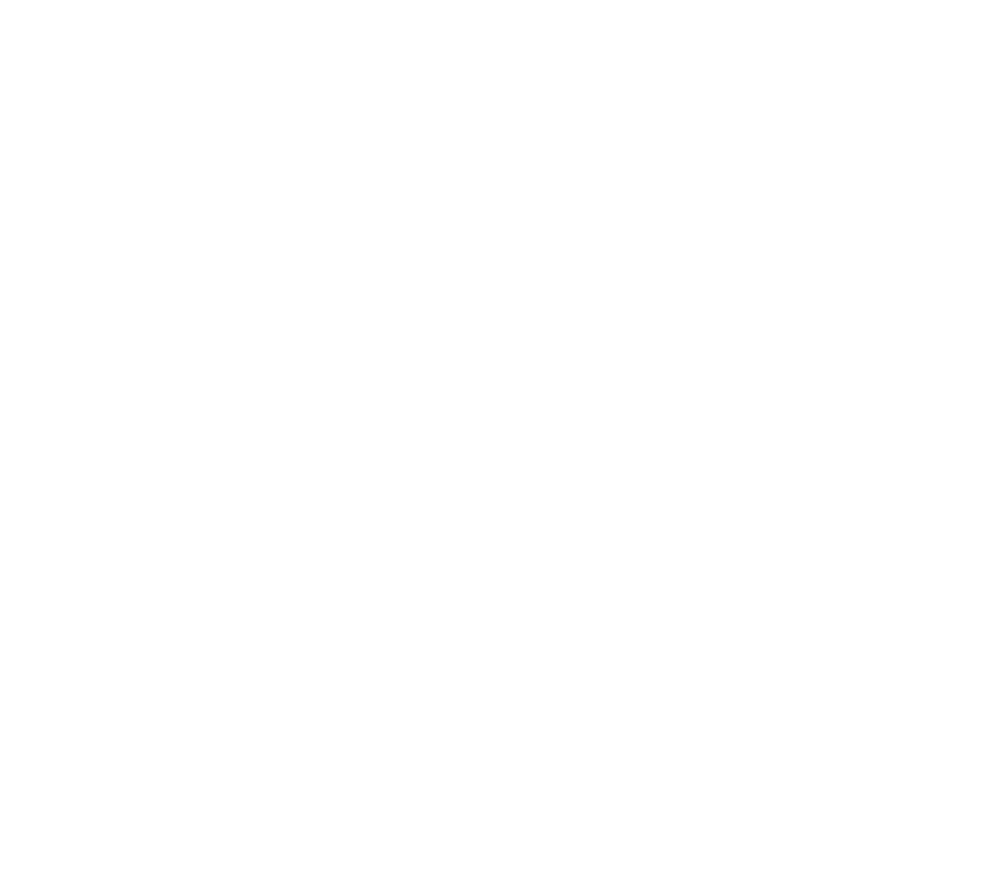

In [73]:
#PLot unit spending by month
ax = df_unit_spending_by_month.plot(figsize=(8,7))
#Use this trick to place legend outside of the main plot by placing it at coords (1.05,1), 
#where (1,1) is top right corner of Axes
plt.legend(bbox_to_anchor=(1.05, 1))

<IPython.core.display.Javascript object>


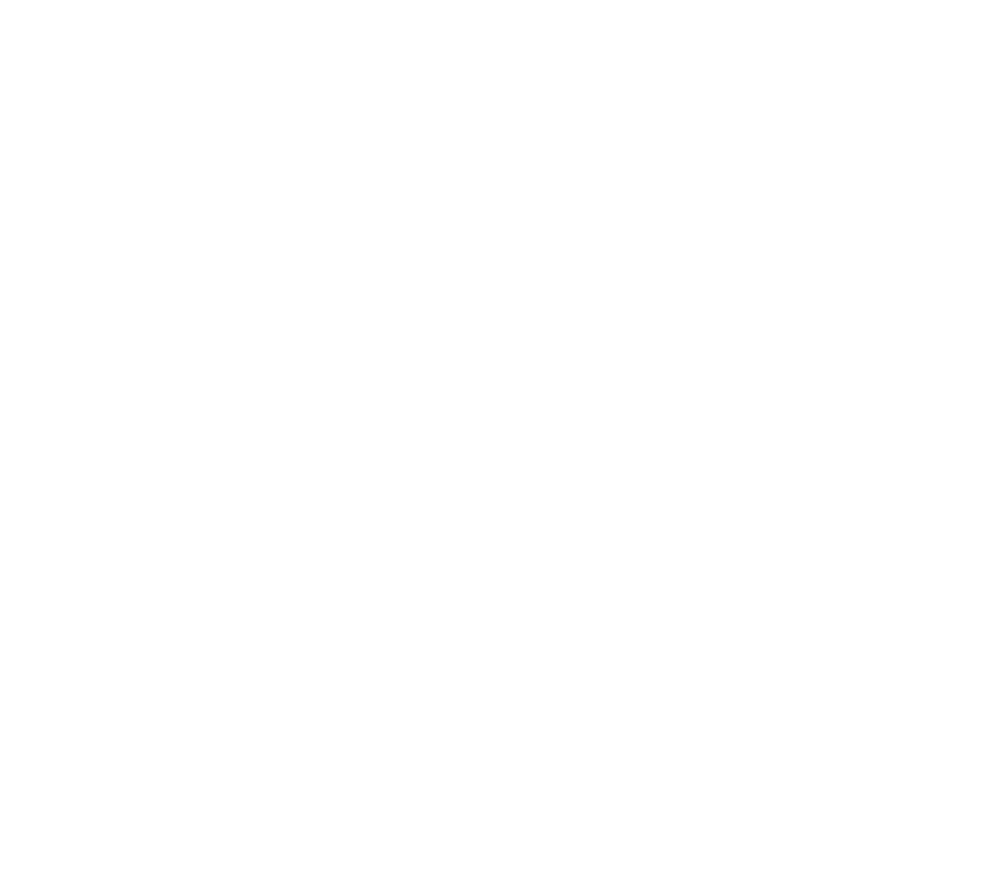

In [74]:
#PLot LOE spending by month
ax = df_loe_spending_by_month.plot(figsize=(8,7))
#Use this trick to place legend outside of the main plot by placing it at coords (1.05,1), 
#where (1,1) is top right corner of Axes
plt.legend(bbox_to_anchor=(1.05, 1))

<IPython.core.display.Javascript object>


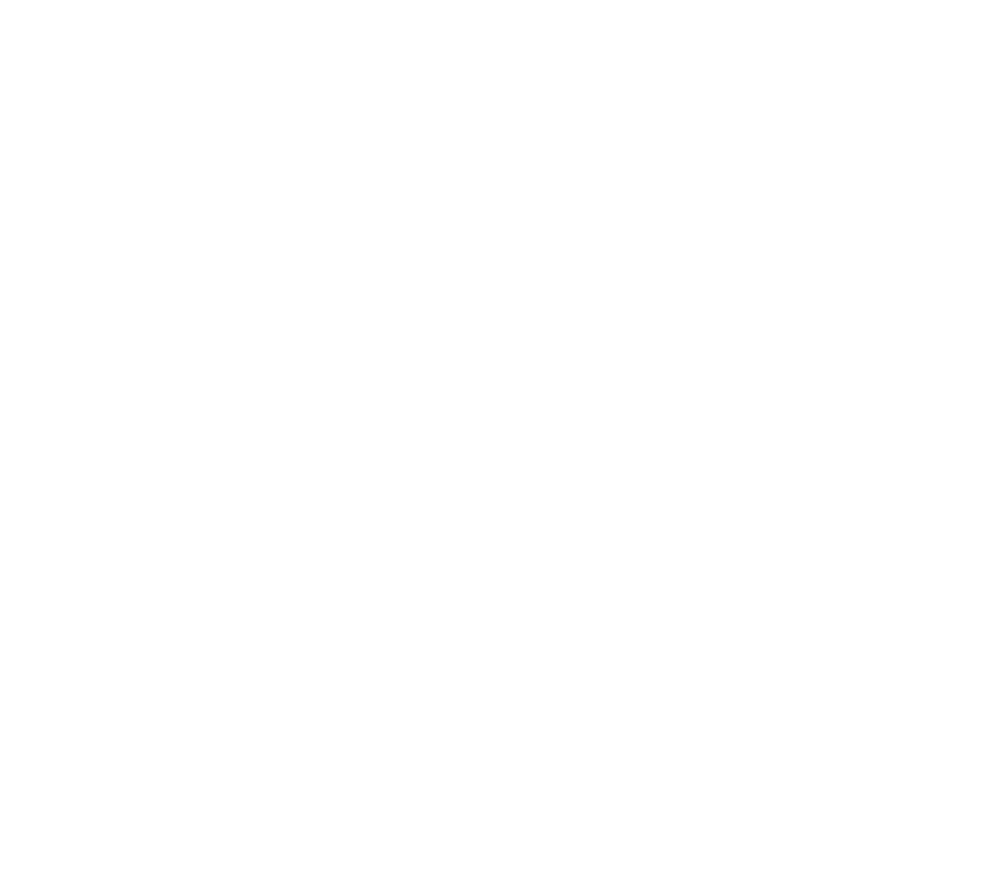

In [75]:
#Plot unit spendign by LOE
ax = df_loe_spending_by_unit.plot.barh(stacked=True,figsize=(8,7))
plt.legend(bbox_to_anchor=(1.05, 1))

<IPython.core.display.Javascript object>


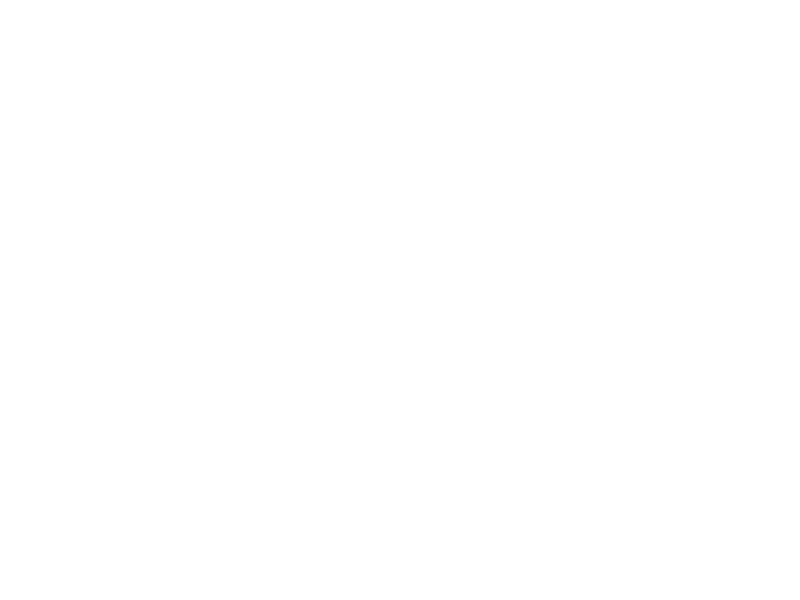

In [76]:
#Create a pie chart for a given LOE
df_unit_spending_by_loe.plot.pie(y='ABCT')
plt.legend(bbox_to_anchor=(1.8, 1))

<IPython.core.display.Javascript object>


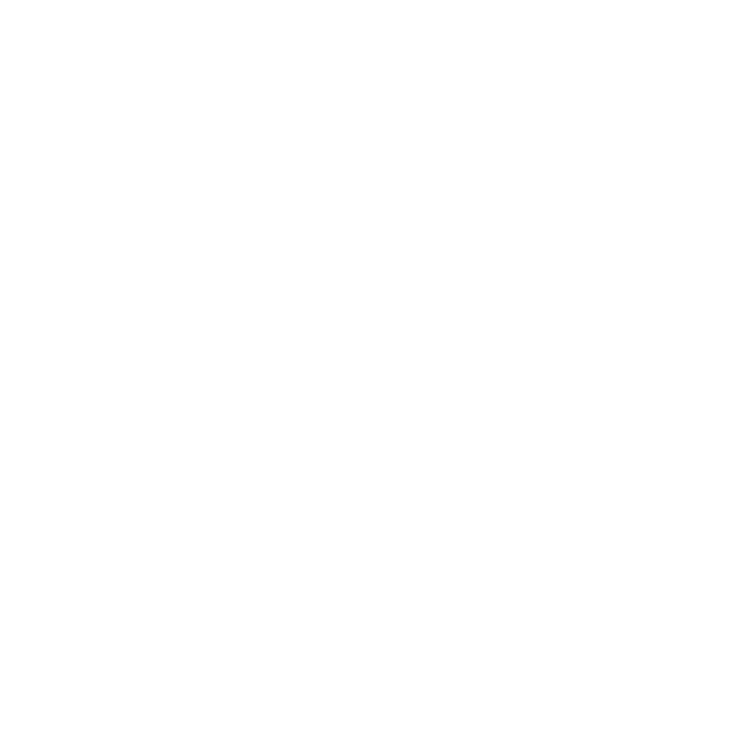

[Text(0, 0, '1.1 Forces'),
 Text(0, 0, '1.2 Footprint'),
 Text(0, 0, '1.3 Materiel'),
 Text(0, 0, '2.1 Mil-Mil Relationships'),
 Text(0, 0, '2.2 Stability and Support Operations'),
 Text(0, 0, '2.3 Warfighting'),
 Text(0, 0, '3.1 Joint Land Operations'),
 Text(0, 0, '3.2 Regional Land Power Network'),
 Text(0, 0, '4.1 Capabilities, Enhancement, and Modernize'),
 Text(0, 0, '4.2 Training and Education'),
 Text(0, 0, '4.3 Health, Welfare, and Safety')]

In [77]:
#Make heatmap using the NBA example we saw earlier
fig, ax = plt.subplots(figsize=(6,6))
ax.pcolor(df_loe_spending_by_unit,cmap="YlGnBu")

# put the major ticks at the middle of each cell
ax.set_yticks(np.arange(df_loe_spending_by_unit.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(df_loe_spending_by_unit.shape[1]) + 0.5, minor=False)
ax.set_yticklabels(list(df_spent.Unit.unique()))
ax.set_xticklabels(list(df_spent.LOE.unique()),rotation=90)

# Seaborn

The python plotting package [Seaborn](https://seaborn.pydata.org/index.html) is popular in the python data visualization ecosystem as it provides many great looking plot templates and integrates well with matplotlib and pandas.  Here are a few quick examples.

In [78]:
#Standard import 
import seaborn as sns

Notice that it was quite a pain to produce the heatmap using matplotlib.  Seaborn can produce a heatmap in one step.

Note: If you are starting from this point in the notebook, may have to use Cell -> Run All Above to load the data and libraries.

<IPython.core.display.Javascript object>


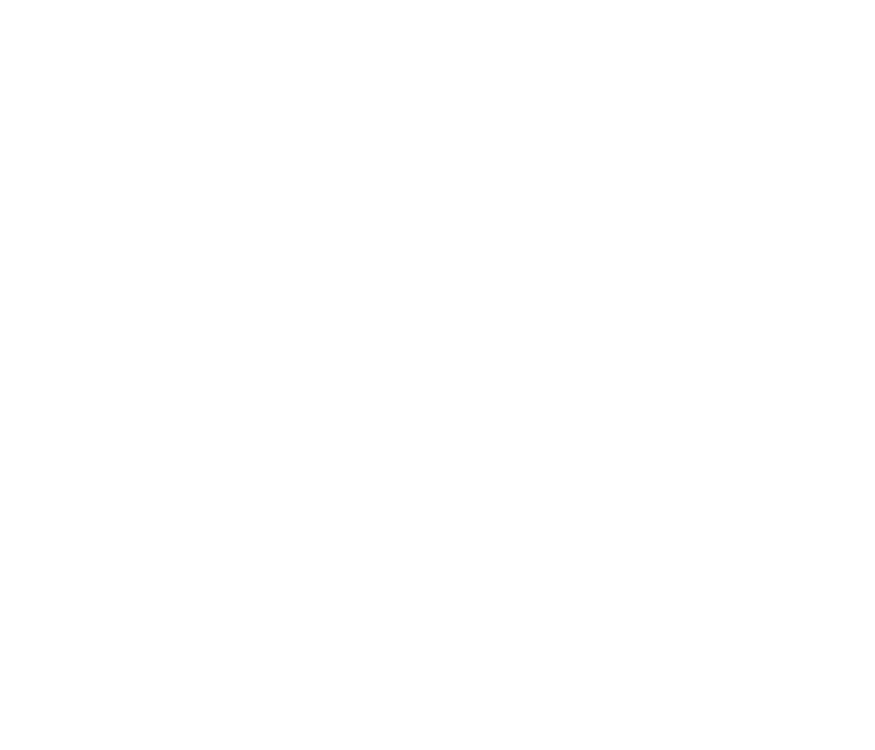

In [79]:
plt.figure(figsize=(7,6))
ax = sns.heatmap(df_loe_spending_by_unit,cmap="YlGnBu",yticklabels=list(df_spent.Unit.unique()))

C:\Users\matthew.d.smith\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>


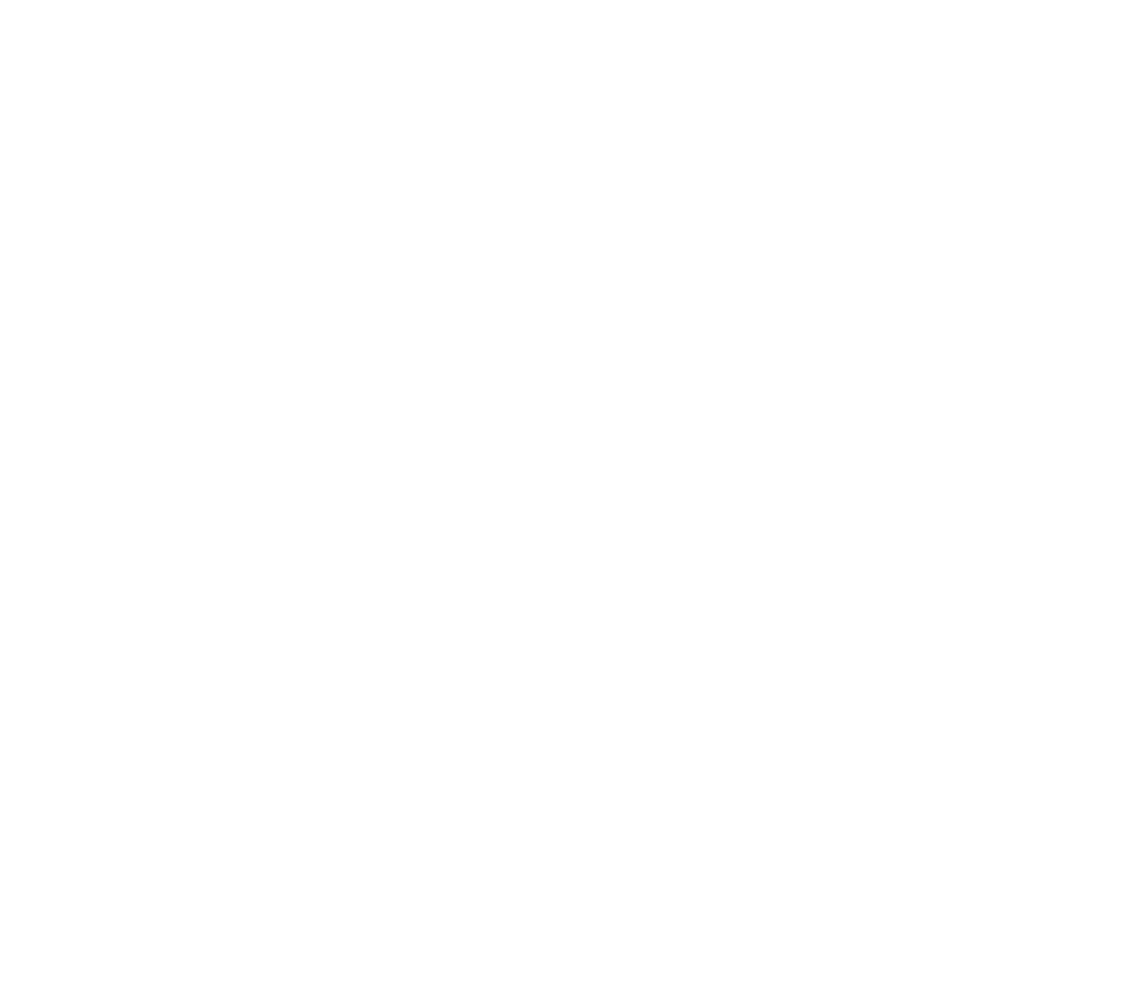

In [80]:
#Pairplots
sns.pairplot(df_iris, hue='Name', diag_kind='kde', size=2);

<IPython.core.display.Javascript object>


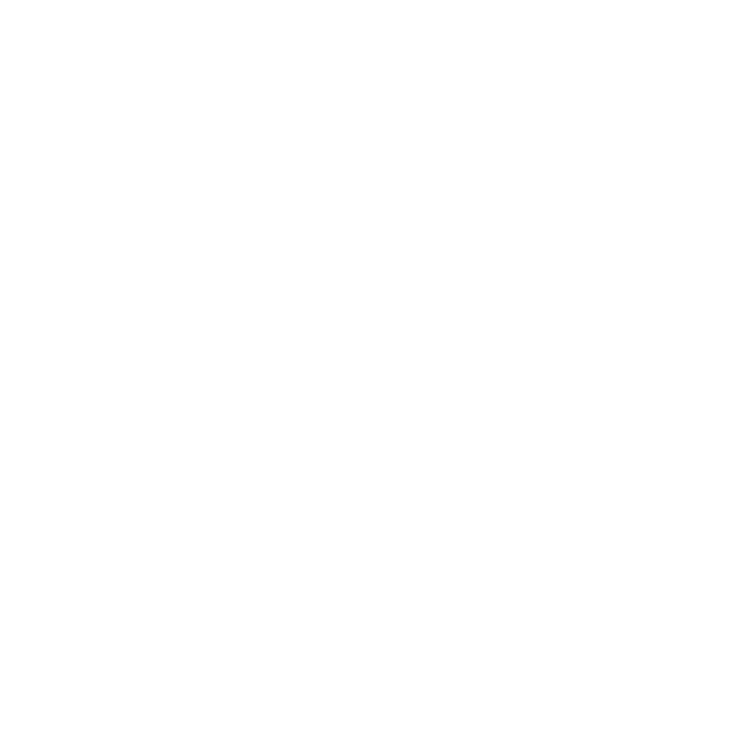

In [81]:
#Make a joint plot
r1 = np.random.normal(loc=0.0, scale=1.0, size=10000)
r2 = np.random.gamma(2, size=10000)

sns.jointplot(r1, r2, alpha=0.4);

<IPython.core.display.Javascript object>


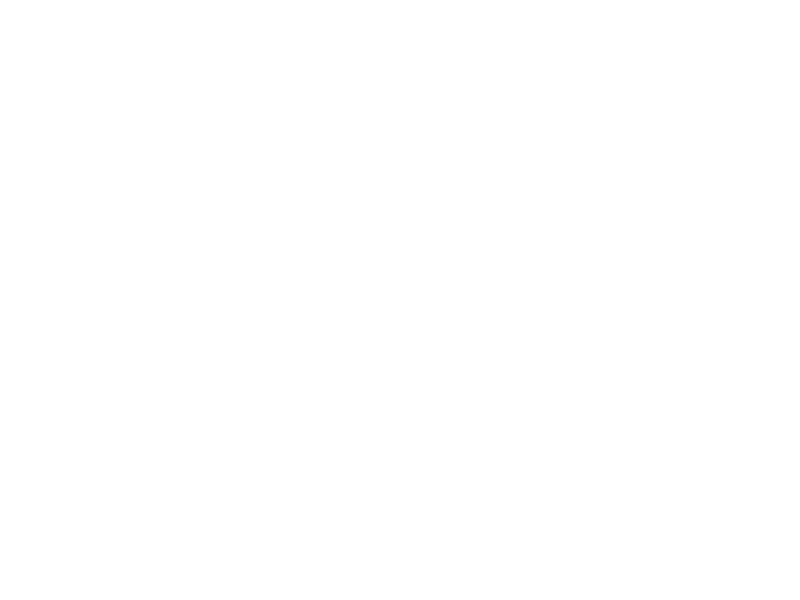

In [82]:
#Stacked bar chart along with kernel density estimate
plt.figure()
plt.hist([r1, r2], histtype='barstacked',density=True);
r3 = np.concatenate((r1,r2))
sns.kdeplot(r3);

# Interactive Graphics with Bokeh

Although matplotlib, pandas, and seaborn are great for producing static images, they provide hardly any ability to produce interactive graphics.  Bokeh provides the ability to produce rich, interactive graphics that can be shared over the web, and has grown in popularity in recent years.  I used it extensively in my last data science role and got a lot of positive feedback from users who enjoyed the interactive graphics.  

As an example, see https://mdsmith44.github.io/COVID19_Analysis/ for an example COVID19 dashboard built in bokeh.  We will show here how to create the "square map" portion.

The [bokeh documentation](https://docs.bokeh.org/en/latest/index.html) has a useful tutorial and a great [gallery](https://docs.bokeh.org/en/latest/docs/gallery.html#gallery) with many helpful examples.  We give a quick demo here to give an idea for the power of the bokeh package.

In [83]:
#Re-import in case you are starting from this point in the notebook
import pandas as pd
import numpy as np

### Example: COVID19 Dashboard

Read in state data from COVID Tracking Project.  See https://covidtracking.com/api for reference on their API and a description of the data.  We are using the "Historic Value of All States" link, https://covidtracking.com/api/v1/states/daily.csv.  

##### Read in and Process Data

In [84]:
#Read in latest data from url
url = 'https://covidtracking.com/api/v1/states/daily.csv'
df_states = pd.read_csv(url)
df_states.iloc[np.r_[0:3,-3:0]] #Look at first few and last few rows

date state  positive  probableCases   negative  pending  \
0      20201109    AK   20300.0            NaN   747697.0      NaN   
1      20201109    AL  204857.0        31003.0  1232975.0      NaN   
2      20201109    AR  122811.0        11050.0  1324655.0      NaN   
14108  20200123    WA       0.0            NaN        0.0      NaN   
14109  20200122    MA       NaN            NaN        NaN      NaN   
14110  20200122    WA       0.0            NaN        0.0      NaN   

         totalTestResultsSource  totalTestResults  hospitalizedCurrently  \
0               totalTestsViral          767997.0                  119.0   
1               totalTestsViral         1406829.0                 1174.0   
2               totalTestsViral         1436416.0                  786.0   
14108  totalTestEncountersViral               0.0                    NaN   
14109           totalTestsViral               1.0                    NaN   
14110  totalTestEncountersViral               0.0                    NaN   

       hospitalizedCumulative  ...   posNeg  deathIncrease  \
0                         NaN  ...   767997              0   
1                     21294.0  ...  1437832              0   
2                      7496.0  ...  1447466             23   
14108                     NaN  ...        0              0   
14109                     NaN  ...        0              0   
14110                     NaN  ...        0              0   

       hospitalizedIncrease                                      hash  \
0                         0  3870df06bb2c6e3d73dd09173187086f3135f2a3   
1                         0  b4671c38fdf433f896e020b00e1307a374689872   
2                        62  762f8f0f6ad0d5974ee7c2b20b367bc91bd44e8f   
14108                     0  1c2229c239ffad5e5fdd9d76c641dc9166caf6ba   
14109                     0  01f5dcd6631859503ef1b62d81d49e41d12fc1bd   
14110                     0  4502685e582e68071bfe8f7e1b307bc09c16728d   

       commercialScore negativeRegularScore negativeScore positiveScore score  \
0                    0                    0             0             0     0   
1                    0                    0             0             0     0   
2                    0                    0             0             0     0   
14108                0                    0             0             0     0   
14109                0                    0             0             0     0   
14110                0                    0             0             0     0   

       grade  
0        NaN  
1        NaN  
2        NaN  
14108    NaN  
14109    NaN  
14110    NaN  

[6 rows x 55 columns]

In [85]:
#If the url doesn't work, you can also read in this snapshot from 20200616
# df_states = pd.read_csv('Data/COVID_Tracking_Data_20200616.csv')
# df_states.head()

Data Cleaning and Prep

In [86]:
#Convert date to datetime
df_states.date= pd.to_datetime(df_states.date.astype(str))

#Find as_of_date
as_of_date = pd.to_datetime(str(df_states.date.iloc[0])).strftime('%m/%d/%Y')
print('As of date: {}'.format(as_of_date))

#Narrow down to columns we care about
cols_to_keep = ['date','state','hospitalizedCurrently','positiveIncrease','deathIncrease',
               'totalTestResultsIncrease']
new_col_names = {'hospitalizedCurrently':'Num_Hospitalized',
                'positiveIncrease':'New_Cases',
                'deathIncrease':'New_Deaths',
                'totalTestResultsIncrease':'New_Tests'}
df_states = df_states[cols_to_keep]
df_states.rename(columns=new_col_names,inplace=True)

#Add in new column for percentage of tests that are positive
df_states['Positive_Test_Percentage'] = (df_states.New_Cases / df_states.New_Tests * 100).round(2)

#Fill NAs with 0
df_states = df_states.fillna(0)

df_states.iloc[np.r_[0:3,-3:0]] #View first 3 and last 3 entries

As of date: 11/09/2020


date state  Num_Hospitalized  New_Cases  New_Deaths  New_Tests  \
0     2020-11-09    AK             119.0        474           0     -13304   
1     2020-11-09    AL            1174.0       1170           0       4138   
2     2020-11-09    AR             786.0        945          23       8545   
14108 2020-01-23    WA               0.0          0           0          0   
14109 2020-01-22    MA               0.0          0           0          0   
14110 2020-01-22    WA               0.0          0           0          0   

       Positive_Test_Percentage  
0                         -3.56  
1                         28.27  
2                         11.06  
14108                      0.00  
14109                      0.00  
14110                      0.00

Also read in a file showing the locations of the cells for each state in the map.  This will be the foundation of our plot that we will be able to feed into bokeh.

In [87]:
df_plot = pd.read_csv('Data/US_Square_Map.csv') #Just has data for 51 states (main 50 plus DC)
df_plot['y_text'] = df_plot['y'] + .45 #location to plot state labels
df_plot.head()

State  x  y  y_text
0    AK  0  7    7.45
1    CA  0  3    3.45
2    OR  0  4    4.45
3    WA  0  5    5.45
4    HI  0  0    0.45

In [88]:
#Read in state populations and add them to df_plot
df_pop = pd.read_csv('Data/state_populations.csv')
df_pop.rename(columns={'State':'State_Name'},inplace=True)
df_pop.head(2)

Nun  State_Name  Population Code
0    1  California  39,512,223   CA
1    2       Texas  28,995,881   TX

In [89]:
#Add population to df_plot
df_plot = pd.merge(df_plot,df_pop[['Code','State_Name','Population']],left_on='State',right_on='Code',how='left')
del df_plot['Code']
#Convert population to number
df_plot['Population'] = df_plot.Population.str.replace(',','').astype(int)
df_plot.head(2)

State  x  y  y_text  State_Name  Population
0    AK  0  7    7.45      Alaska      731545
1    CA  0  3    3.45  California    39512223

Process data to get number of recent cases and trendlines for each state

In [90]:
#Define how many days are in the window for "recent cases"
recent_window = 14

#Define per capita population metric, e.g. "# of Cases per 10,000 residents"
per_capita = 10000

#Define number of days to use in the trendlines
trendline_window = 60

#Define length of days to use as the rolling average window, e.g. 7-day rolling averages
rolling_window = 7

In [91]:
#Get count of recent cases for each state
df_rec = df_states.groupby('state')['New_Cases'].agg(lambda x: x.iloc[0:recent_window].sum()).reset_index()
df_rec.rename(columns={'New_Cases':'Cases_recent'},inplace=True)
df_rec.head(3)

state  Cases_recent
0    AK          5887
1    AL         19535
2    AR         16084

In [92]:
#Add these to df_plot, and also get Cases_recent per capita
df_plot = pd.merge(df_plot,df_rec,left_on='State',right_on='state',how='left')
df_plot.drop(columns=['state'],inplace=True)
df_plot.head(2)

State  x  y  y_text  State_Name  Population  Cases_recent
0    AK  0  7    7.45      Alaska      731545          5887
1    CA  0  3    3.45  California    39512223         70841

In [93]:
#Add in per capita
df_plot['Cases_recent_per_pop'] = df_plot.Cases_recent / df_plot.Population * per_capita
df_plot.iloc[np.r_[0:3,-3:0]]

State   x  y  y_text     State_Name  Population  Cases_recent  \
0     AK   0  7    7.45         Alaska      731545          5887   
1     CA   0  3    3.45     California    39512223         70841   
2     OR   0  4    4.45         Oregon     4217737          8719   
48    MA  10  5    5.45  Massachusetts     6892503         20950   
49    NH  10  6    6.45  New Hampshire     1359711          2302   
50    ME  10  7    7.45          Maine     1344212          1634   

    Cases_recent_per_pop  
0              80.473518  
1              17.928882  
2              20.672223  
48             30.395344  
49             16.930068  
50             12.155821

Next we want to add, for each state, the x and y coordinates of the trendline for each metric.  Each state is represented by a 1x1 square cell centered on the x-y coordinates in df_plot.  That is, for Alaska with (x,y) = (0,7), the square cell runs from -0.5 to 0.5 in x, and 6.5 to 7.5 in y.  We want to define a series of x and y cooridnates that will allow the trendline to fit within the trendline window, as illustrated here.

<img src='Images/trendline_window.png' width=500 align=center>

In [94]:
#Define the extent of the trendline windows with (0,0) being center of each square
x_min = -0.4
x_max = 0.4
y_min = -0.4
y_max = 0.1

#Add in list of x coords for each state
def add_xs(row):
    x = row['x']
    xs = xs = np.linspace(x+x_min,x+x_max,trendline_window)
    row['xs'] = xs
    return row
df_plot = df_plot.apply(add_xs,axis=1)

#Define funtion to add in y coords
#Now define a function to add the y-coords (ys) for the trendline of a given field
def add_trendline(df,field):
    #Build a function add_ys that we can apply to each row of df_plot
    def add_ys(row):
        curr_state = row['State']
        y = row['y']
        #Get 7-day rolling average of "field" over past trendline window
        field_values = df_states[df_states.state==curr_state][field].tolist()
        field_rolling_ave = []
        for i in np.arange(trendline_window):
            field_rolling_ave.append(np.mean(field_values[i:i+7]))
        #rolling_ave goes backwards over last 60 days.  Reverse it to get D-60 to today
        field_rolling_ave = list(reversed(field_rolling_ave))
        
        #Find max and min over day range
        ave_max = max(field_rolling_ave)
        ave_min = min(field_rolling_ave)
        #Specify y_max and y_min for the trendline window
        #Note that y is the MIDDLE of the square, which goes y-.5 to y+.5, and state label is at y+.45
        y_max = y+.1
        y_min = y-.3
        #Now map ave_min to y_min and ave_max to y_max
        ys = y_min + (np.array(field_rolling_ave)-ave_min)*(y_max-y_min)/(ave_max-ave_min)
        row['ys_'+field] = ys
        return row
    df = df.apply(add_ys,axis=1)
    return df


In [95]:
#Apply this function to each of the numerical metrics in df_states
rolling_ave_cols = [c for c in df_states if (df_states[c].dtype in ['int64','float64'])]
rolling_ave_cols

['Num_Hospitalized',
 'New_Cases',
 'New_Deaths',
 'New_Tests',
 'Positive_Test_Percentage']

In [96]:
for c in rolling_ave_cols:
    df_plot = add_trendline(df_plot,c)
df_plot.head(3)

<ipython-input-94-a3d7ad68f934>:38: RuntimeWarning: invalid value encountered in true_divide
  ys = y_min + (np.array(field_rolling_ave)-ave_min)*(y_max-y_min)/(ave_max-ave_min)
<ipython-input-94-a3d7ad68f934>:38: RuntimeWarning: invalid value encountered in subtract
  ys = y_min + (np.array(field_rolling_ave)-ave_min)*(y_max-y_min)/(ave_max-ave_min)
<ipython-input-94-a3d7ad68f934>:38: RuntimeWarning: invalid value encountered in double_scalars
  ys = y_min + (np.array(field_rolling_ave)-ave_min)*(y_max-y_min)/(ave_max-ave_min)


State  x  y  y_text  State_Name  Population  Cases_recent  \
0    AK  0  7    7.45      Alaska      731545          5887   
1    CA  0  3    3.45  California    39512223         70841   
2    OR  0  4    4.45      Oregon     4217737          8719   

   Cases_recent_per_pop                                                 xs  \
0             80.473518  [-0.4, -0.3864406779661017, -0.372881355932203...   
1             17.928882  [-0.4, -0.3864406779661017, -0.372881355932203...   
2             20.672223  [-0.4, -0.3864406779661017, -0.372881355932203...   

                                 ys_Num_Hospitalized  \
0  [6.7084210526315795, 6.705052631578948, 6.7, 6...   
1  [3.1, 3.081876724931003, 3.059567617295308, 3....   
2  [3.7105625717566015, 3.7169919632606203, 3.723...   

                                        ys_New_Cases  \
0  [6.712261089073206, 6.713559322033898, 6.70966...   
1  [2.7641613732240704, 2.7476943218736363, 2.742...   
2  [3.7068324541572473, 3.710449635769907, 3.7097...   

                                       ys_New_Deaths  \
0  [6.775, 6.75, 6.75, 6.75, 6.75, 6.75, 6.75, 6....   
1  [2.96, 2.9672, 2.9768, 3.008, 3.0352, 3.1, 3.0...   
2  [3.8517241379310345, 3.8655172413793104, 3.906...   

                                        ys_New_Tests  \
0  [6.7, 6.704278861494032, 6.7032599819370615, 6...   
1  [2.7153788040532776, 2.7, 2.7023879518468035, ...   
2  [3.7992961659566586, 3.8212817188368216, 3.769...   

                         ys_Positive_Test_Percentage  
0  [6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, ...  
1  [3.033333333333333, 3.025082508250825, 3.01617...  
2  [3.710244735344337, 3.7, 3.727698728893948, 3....

In [97]:
#Add new column 'ys_active' since we will only show one trendline at a time
df_plot['ys_active'] = df_plot.ys_New_Cases
df_plot.head(2)

State  x  y  y_text  State_Name  Population  Cases_recent  \
0    AK  0  7    7.45      Alaska      731545          5887   
1    CA  0  3    3.45  California    39512223         70841   

   Cases_recent_per_pop                                                 xs  \
0             80.473518  [-0.4, -0.3864406779661017, -0.372881355932203...   
1             17.928882  [-0.4, -0.3864406779661017, -0.372881355932203...   

                                 ys_Num_Hospitalized  \
0  [6.7084210526315795, 6.705052631578948, 6.7, 6...   
1  [3.1, 3.081876724931003, 3.059567617295308, 3....   

                                        ys_New_Cases  \
0  [6.712261089073206, 6.713559322033898, 6.70966...   
1  [2.7641613732240704, 2.7476943218736363, 2.742...   

                                       ys_New_Deaths  \
0  [6.775, 6.75, 6.75, 6.75, 6.75, 6.75, 6.75, 6....   
1  [2.96, 2.9672, 2.9768, 3.008, 3.0352, 3.1, 3.0...   

                                        ys_New_Tests  \
0  [6.7, 6.704278861494032, 6.7032599819370615, 6...   
1  [2.7153788040532776, 2.7, 2.7023879518468035, ...   

                         ys_Positive_Test_Percentage  \
0  [6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, ...   
1  [3.033333333333333, 3.025082508250825, 3.01617...   

                                           ys_active  
0  [6.712261089073206, 6.713559322033898, 6.70966...  
1  [2.7641613732240704, 2.7476943218736363, 2.742...

##### Now plot in bokeh!

In [98]:
#First read in bokeh dependencies
from bokeh.io import show, save
from bokeh.layouts import row, column
from bokeh.models import ColumnDataSource, CustomJS, LinearColorMapper, ColorBar
from bokeh.models.widgets import Select, Div
from bokeh.plotting import figure

#The following calls are needed to view bokeh output from a Jupyter environment
from bokeh.io import output_notebook
from bokeh.resources import INLINE
output_notebook(INLINE)

Loading BokehJS ...

In [99]:
#Bokeh feeds plots with a ColumnDataSource object
#We can create a bokeh ColumnDataSource directly from the pandas DataFrame df_plot
source = ColumnDataSource(df_plot)
#Recall what df_plot looks like
df_plot.head(2)

State  x  y  y_text  State_Name  Population  Cases_recent  \
0    AK  0  7    7.45      Alaska      731545          5887   
1    CA  0  3    3.45  California    39512223         70841   

   Cases_recent_per_pop                                                 xs  \
0             80.473518  [-0.4, -0.3864406779661017, -0.372881355932203...   
1             17.928882  [-0.4, -0.3864406779661017, -0.372881355932203...   

                                 ys_Num_Hospitalized  \
0  [6.7084210526315795, 6.705052631578948, 6.7, 6...   
1  [3.1, 3.081876724931003, 3.059567617295308, 3....   

                                        ys_New_Cases  \
0  [6.712261089073206, 6.713559322033898, 6.70966...   
1  [2.7641613732240704, 2.7476943218736363, 2.742...   

                                       ys_New_Deaths  \
0  [6.775, 6.75, 6.75, 6.75, 6.75, 6.75, 6.75, 6....   
1  [2.96, 2.9672, 2.9768, 3.008, 3.0352, 3.1, 3.0...   

                                        ys_New_Tests  \
0  [6.7, 6.704278861494032, 6.7032599819370615, 6...   
1  [2.7153788040532776, 2.7, 2.7023879518468035, ...   

                         ys_Positive_Test_Percentage  \
0  [6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, ...   
1  [3.033333333333333, 3.025082508250825, 3.01617...   

                                           ys_active  
0  [6.712261089073206, 6.713559322033898, 6.70966...  
1  [2.7641613732240704, 2.7476943218736363, 2.742...

In [100]:
#Build a Select option to specify which trendline to show
trendline_options = [c[3:] for c in df_plot.columns if c.startswith('ys_')] + ['No Trendline']
if 'active' in trendline_options:
    trendline_options.remove('active')
trendline_select = Select(title='Select Trendline to Display',options=trendline_options,value='New_Cases',
                         width=200)

#Add javascript callback to change the source data when user selects an option
callback_code = """
//Grab the plot data
var data = source.data
var ys_active_col = data['ys_active']

//New value of the select widget is automagically available via cb_obj (callback object)
var selected_val = cb_obj.value

if (selected_val == 'No Trendline') {
    //Zero out ys_active column so that no trendlines show up
    for (var i=0; i<ys_active_col.length; i++) {
        ys_active_col[i] = []
    }
} else {
    var curr_ys = 'ys_' + selected_val
    var curr_ys_col = data[curr_ys]
    for (var i=0; i<ys_active_col.length; i++) {
        ys_active_col[i] = curr_ys_col[i]
    }
}
//push the changes 
source.change.emit()
"""
#Create a javascript callback using this code, making sure callback has access to the source
trendline_callback = CustomJS(args=dict(source=source),code=callback_code)
trendline_select.js_on_change('value',trendline_callback)

In [101]:
#Now generate and show the plot!

#Initilize figure
plot_title = 'US COVID Cases as of {}'.format(as_of_date)
#Specify hover tooltips
TOOLTIPS = [
    ("State", "@State_Name"),
    ("Recent Cases", "@Cases_recent")]
p = figure(width=800,title=plot_title,tools=['save','hover','reset'],tooltips=TOOLTIPS)
#Erase all the grid lines, axis labels, and tick labels
p.xgrid.grid_line_color=None
p.ygrid.grid_line_color=None
p.xaxis.major_label_text_color = None
p.yaxis.major_label_text_color = None
p.xaxis.major_tick_line_color = None
p.xaxis.minor_tick_line_color = None
p.yaxis.major_tick_line_color = None
p.yaxis.minor_tick_line_color = None
p.outline_line_color = 'gray'

#Build a color scale to represent the number of recent cases per capita in each state
from bokeh.palettes import RdYlBu11
palette = RdYlBu11[2:-1]
color_mapper = LinearColorMapper(palette = palette, low = 0, high = np.ceil(df_plot.Cases_recent_per_pop.max()))
color_bar_title = "Number of New Cases (last {} days) per {:,} Residents".format(recent_window,per_capita)
color_bar = ColorBar(title=color_bar_title,
                     color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal')

#Plot the state squares with the rect glyph
p.rect(source=source,x='x',y='y',width=1,height=1,fill_color = {'field' :'Cases_recent_per_pop', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25)
p.text(source=source,x='x',y='y_text',text='State',text_align='center',text_baseline='top')
p.add_layout(color_bar, 'below')

#Add trendlines
p.multi_line(source=source,xs='xs',ys='ys_active')

#Add Select filter and explanation of trendlines
I_trendlines = Div(width=250) #I for Info, i.e. Div element that will contain some useful info
trendlines_text = "Trendlines show trend in {}-day rolling averages over the past {} days.".format(rolling_window,
                                                                                                     trendline_window)
I_trendlines.text = trendlines_text

layout1 = row(p,column(trendline_select,I_trendlines))


show(layout1)

#To save
#save(layout1,resource=INLINE,'Images/US_Square_Map.html',title='US COVID Square Map')

And voila!  Hopefully a cool looking square map appeared.  Hover over the states to see that it pops up information, and toggle the trendline filter to show different trendlines.  

You can also save the image as an html file and serve it over a website (e.g. https://mdsmith44.github.io/COVID19_Analysis/) or send the file and allow people to open the fully interactive graphic in a browser.  A couple quick notes about saving files:

1. For some reason, in bokeh you can either SHOW an image, e.g. `show(layout1)` as we did above, or you can SAVE an image, e.g. `save(layout1,resources=INLINE,'Images/US_Square_Map.html')`, but you can't save an image AFTER showing any part of it.  For some reason, showing an image uses up its magic powers.  In a typical workflow, I will show all images in the notebook until I have it right, and then you may have to comment out all show commands, uncomment the save commands, and rerun the entire section.  A bit clunky but it works.
2. Speaking of clunky, an apparent bug in Azure's jupyter notebook environment is that it sometimes won't let you donwnload html files from your project.  You can get around this by saving the image as a text file, `save(layout1,resources=INLINE,'Images/US_Square_Map.txt')`, then downloading it and renaming it to html extension and it works just fine.  I haven't had this issue in other Jupyter settings which makes me think it's an issue with Azure.  

# Making GIFs

Now what everyone came here for, making GIFs!

<img src="Images/carlton_dance.gif" width=400 align=center>

In [102]:
#Re-import in case you're starting at this point in the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


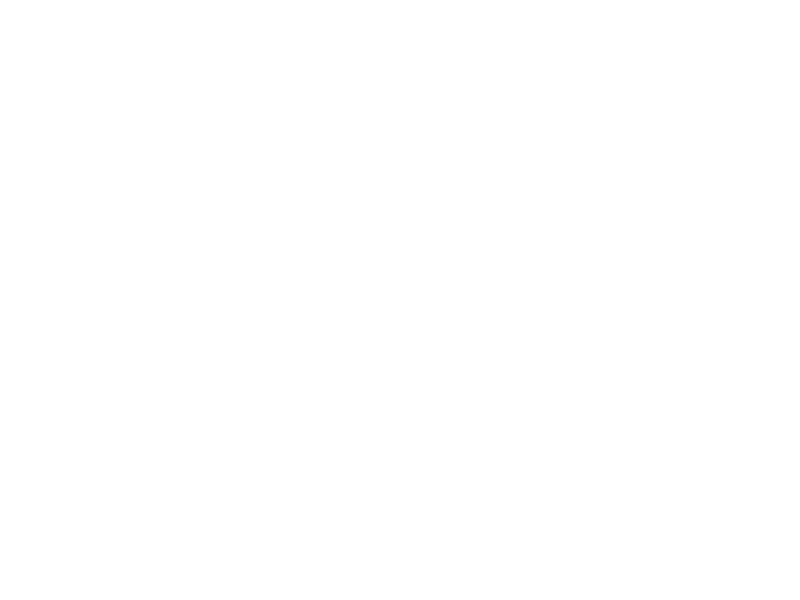

<IPython.core.display.Javascript object>


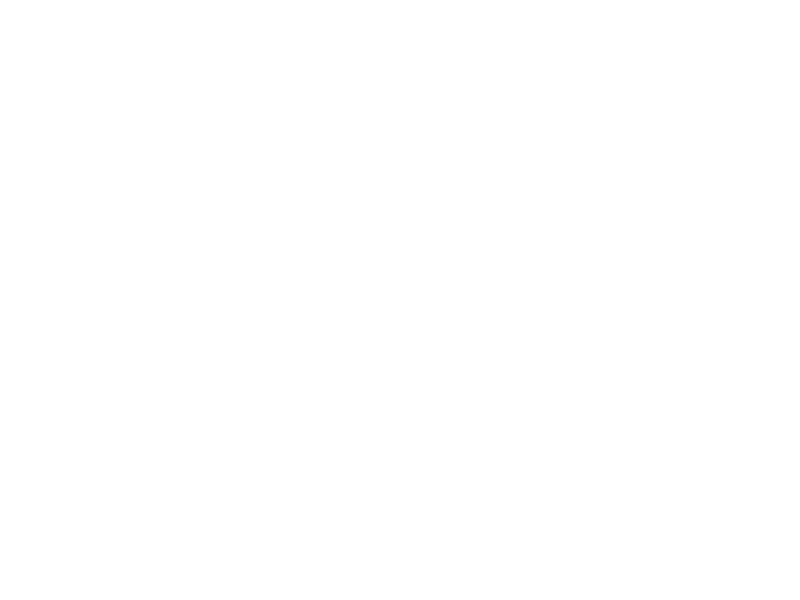

<IPython.core.display.Javascript object>


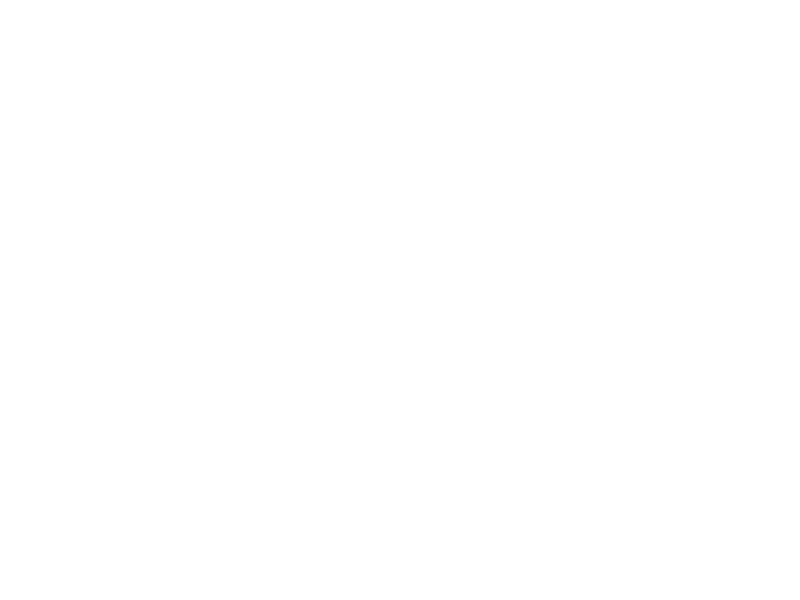

<IPython.core.display.Javascript object>


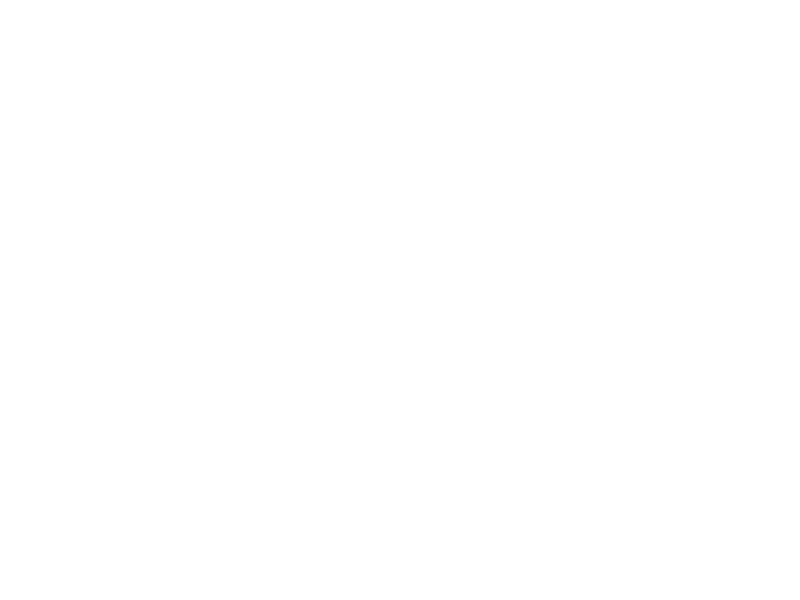

<IPython.core.display.Javascript object>


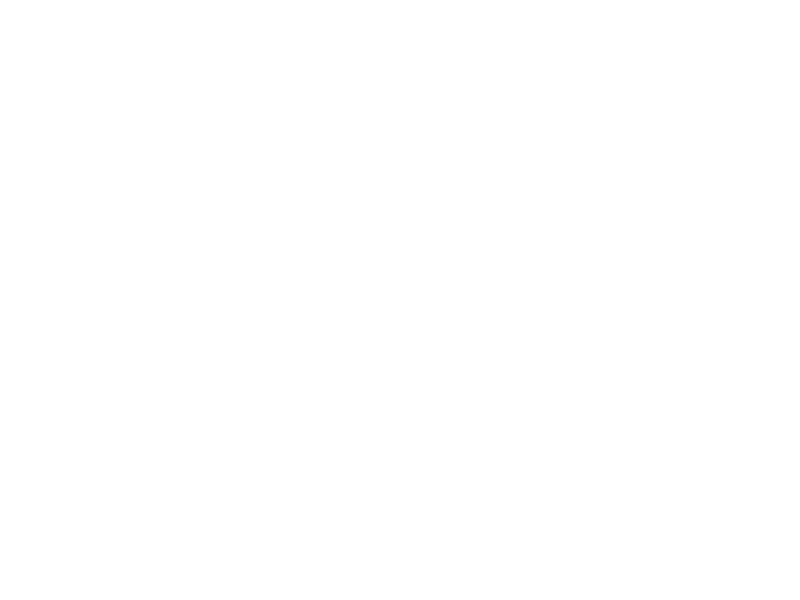

<IPython.core.display.Javascript object>


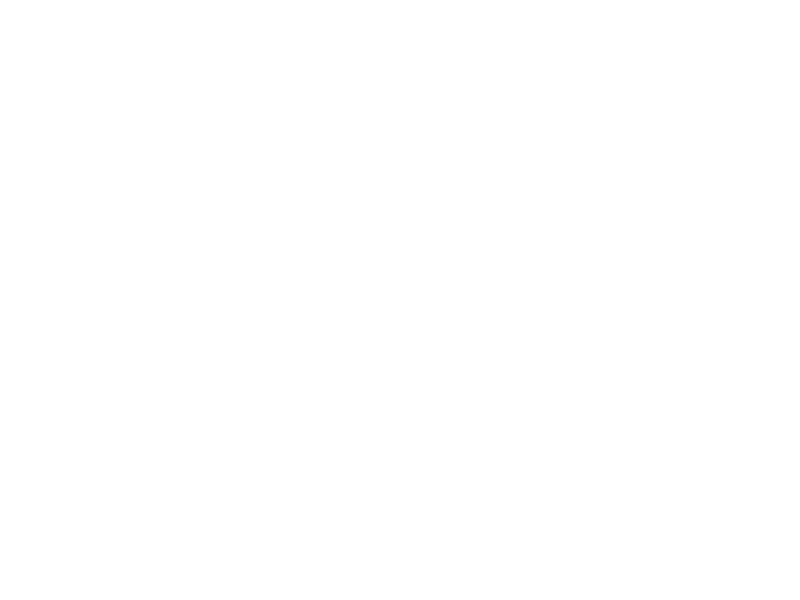

<IPython.core.display.Javascript object>


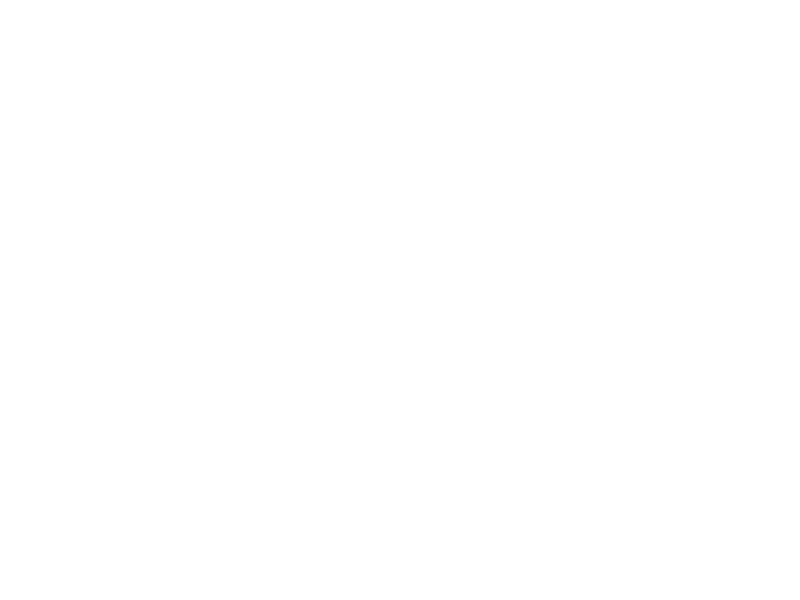

<IPython.core.display.Javascript object>


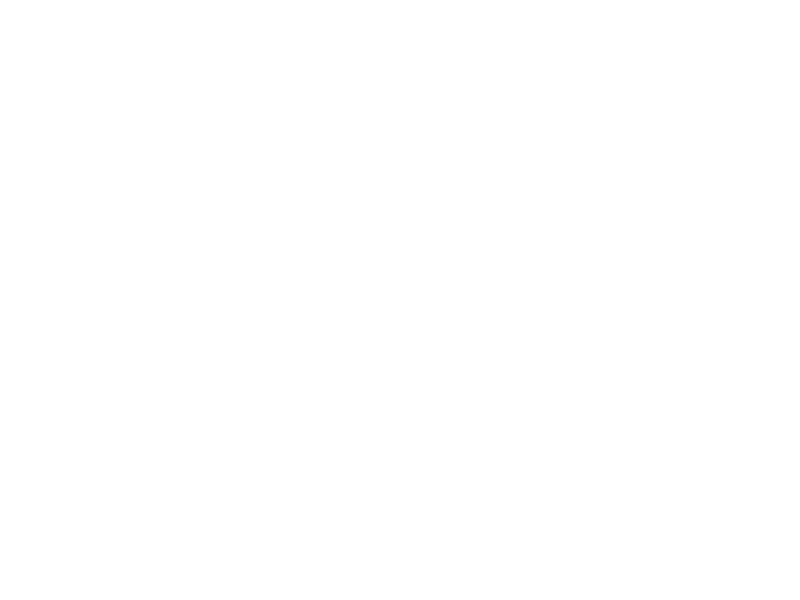

<IPython.core.display.Javascript object>


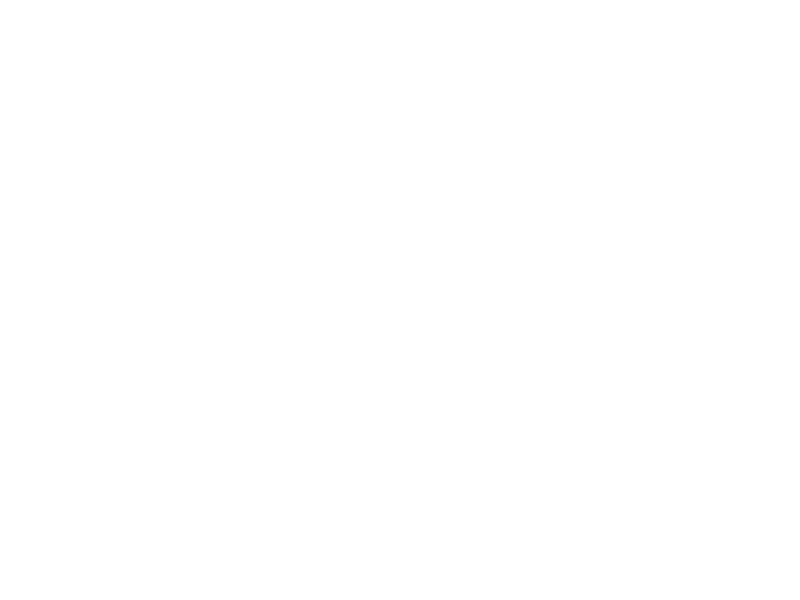

<IPython.core.display.Javascript object>


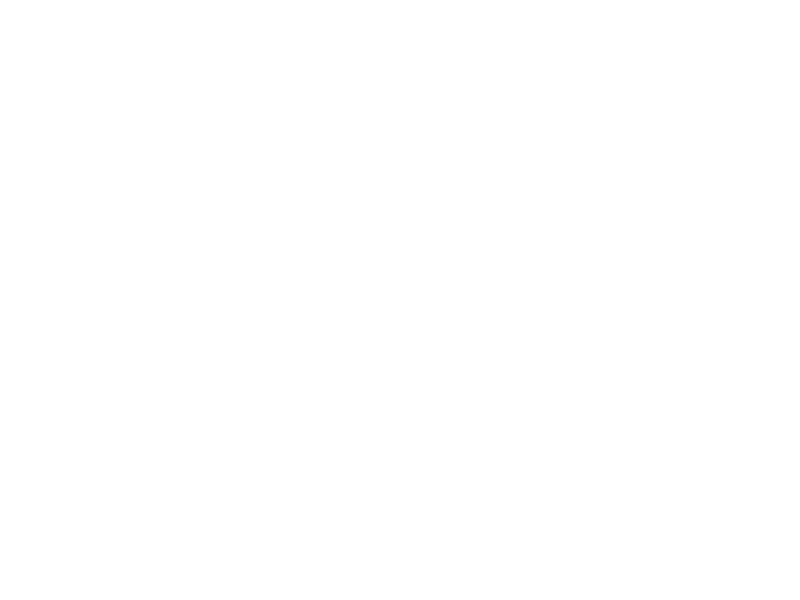

<IPython.core.display.Javascript object>


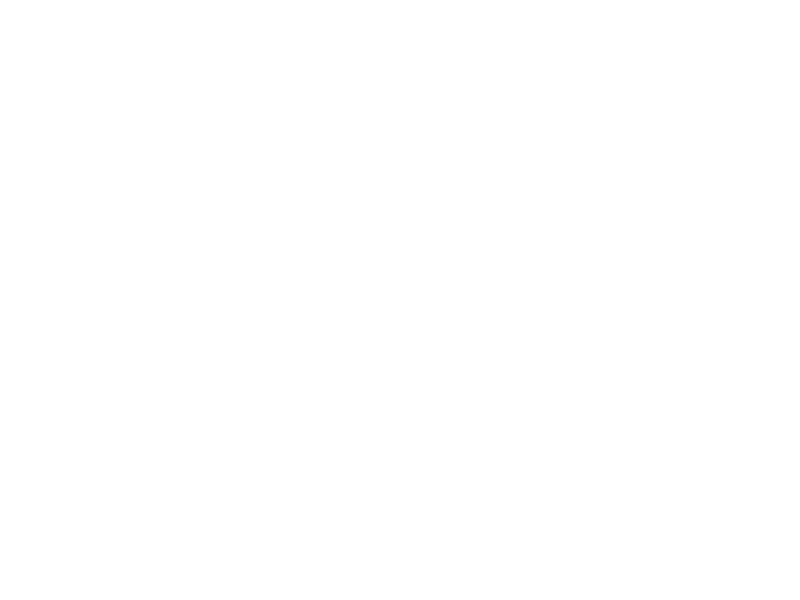

<IPython.core.display.Javascript object>


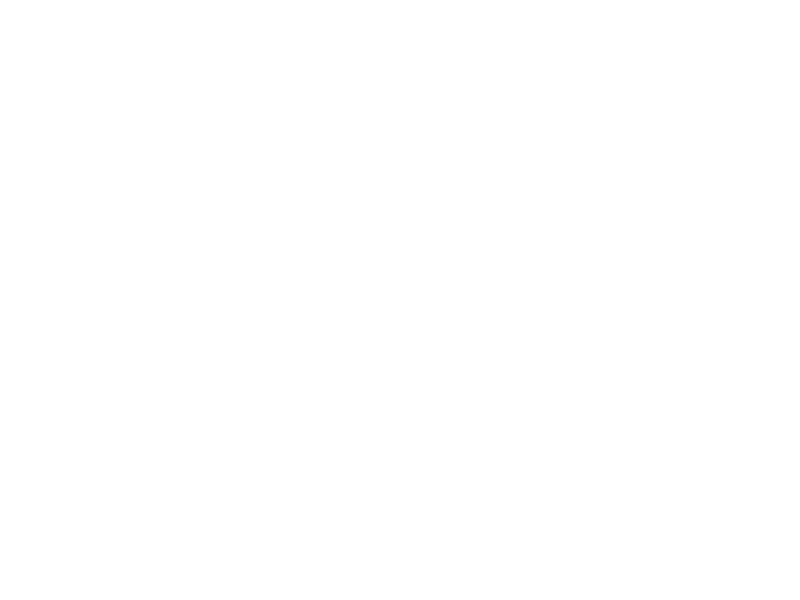

<IPython.core.display.Javascript object>


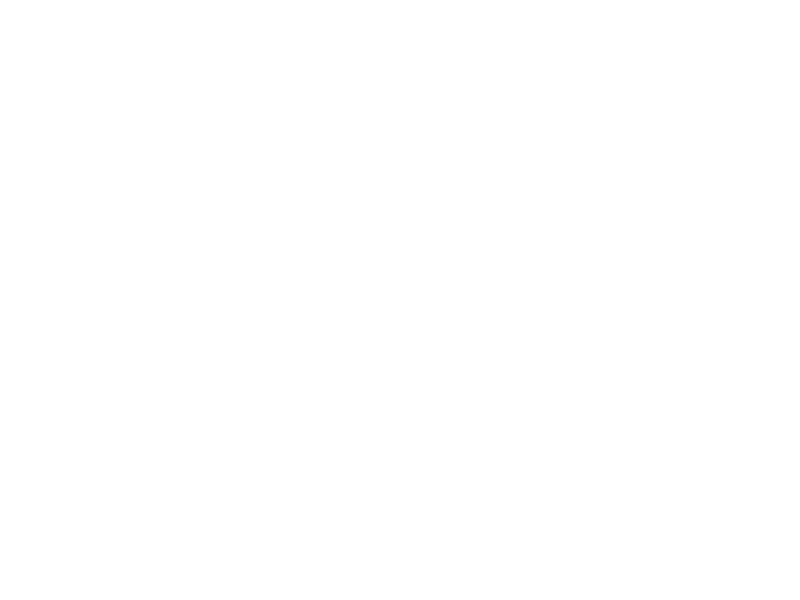

<IPython.core.display.Javascript object>


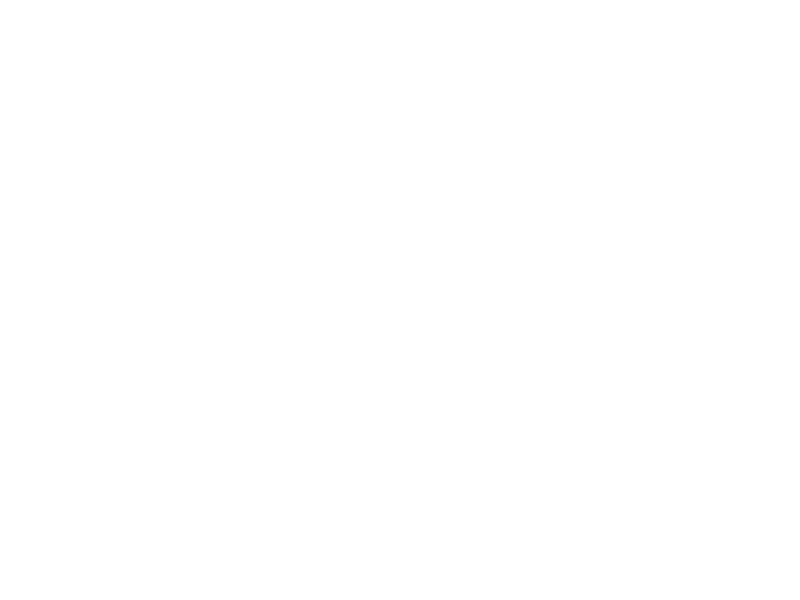

<IPython.core.display.Javascript object>


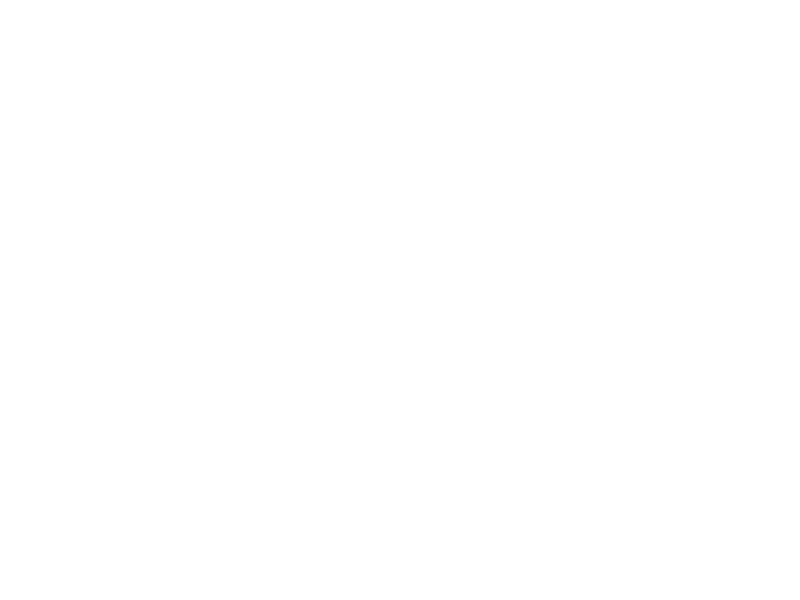

<IPython.core.display.Javascript object>


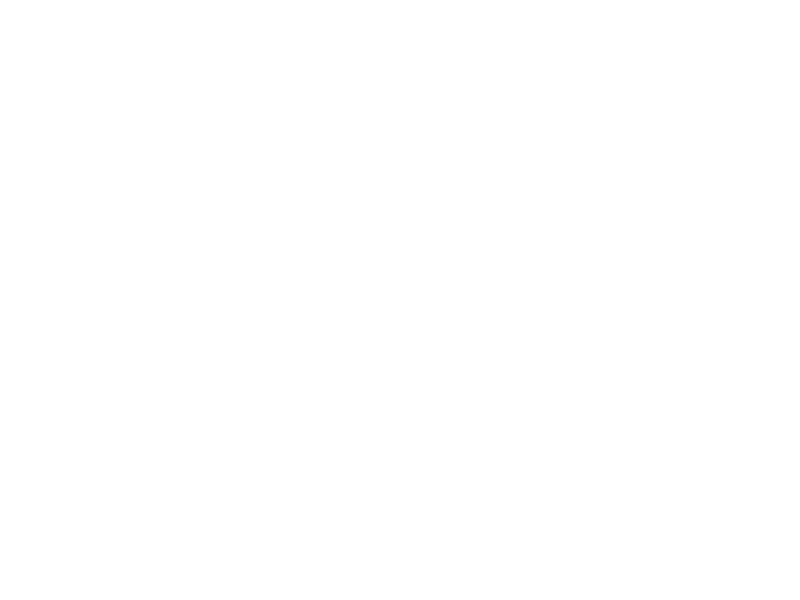

<IPython.core.display.Javascript object>


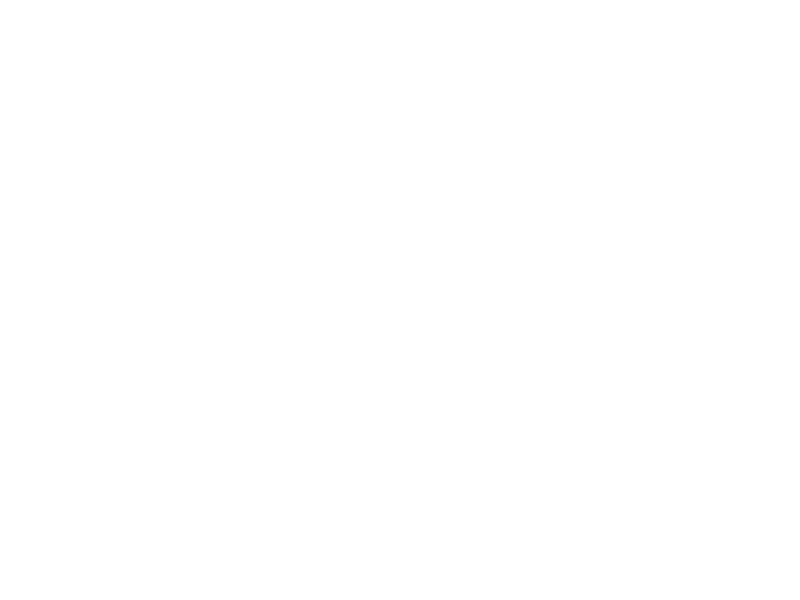

<IPython.core.display.Javascript object>


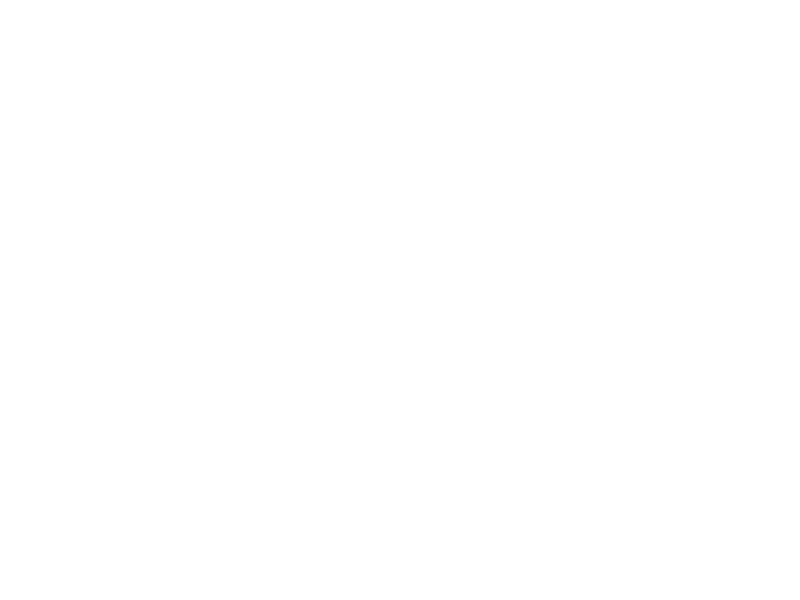

<IPython.core.display.Javascript object>


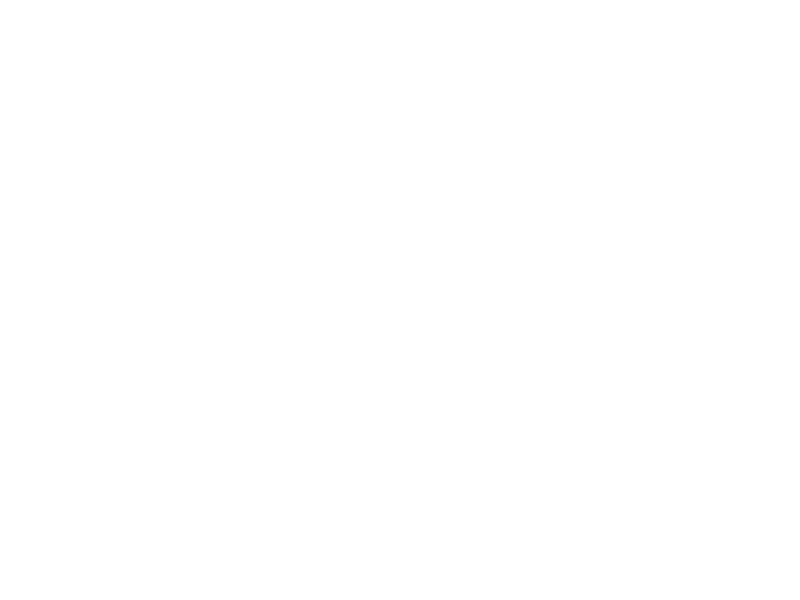

<IPython.core.display.Javascript object>


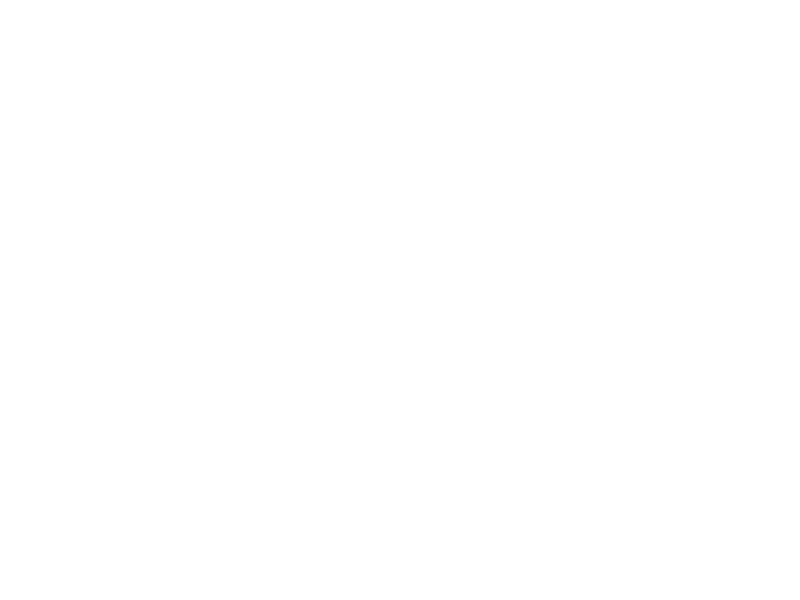

In [103]:
#Create sequence of image files
base_filename = "Images/Image_sequence_{:02d}.png" #Formats numbers to 2 places, e.g. 3 becomes 03
x_list = [np.sin(a) for a in np.linspace(0,2*3.1415,20)]
for i, x in enumerate(x_list):
    fig, ax = plt.subplots()
    plt.scatter(x,0,s=400,c='orange')
    ax.set_xlim([-2,2])
    plt.savefig(base_filename.format(i))
    plt.close() #Stops current plot from showing up in output
    
#Now look in the Images folder to see the sequence of image files

In [104]:
#Convert sequence of images to a GIF
from PIL import Image
import glob
 
# Create the frames
frames = []
imgs = glob.glob("Images/Image_sequence_*.png") #glob grabs all files that match this format, with * being any substring
#sort the images in order
imgs = sorted(imgs)
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

#Save into a GIF file that loops forever (loop=0)
#duration specifies time (in ms) to stay on each image
frames[0].save('Images/my_gif.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)

Now check out the gif file in the Images folder.  You can play around with duration to make the gif faster or slower. 